# Проект: Исследовательский анализ данных

#### Оглавление
[1. Получение данных](#1.0)  
[2. Предобработка данных](#2.0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Пропущенные значения](#2.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Преобразование типов данных](#2.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Устранение дубликатов](#2.3)  
[3. Добавление новых столбцов](#3.0)  
[4. Исследовательский анализ данных](#4.0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Работа с аномалиями](#4.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Насколько быстро продавались квартиры](#4.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.3. Факторы, влияющие на стоимость](#4.3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.4. Средняя цена квадратного метра](#4.4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.5. Зависимость цены от расстояния до центра](#4.5)  
[5. Общий вывод](#5.0)

В проекте используются данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет.

**Задача:** Провести исследовательский анализ данных и установить параметры, алияющие на цену объектов.

**Как будет использоваться результат:** Результаты анализа будут использоваться для построения автоматизированной системы для отслеживания аномалий и мошеннической деятельности.

## 1. Получение данных
<a class="anchor" id="1.0"></a>

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np
plt.style.use('sonia')
%config InlineBackend.figure_format = 'retina'

Получим данные о продаже квартир и выведем первые пять строк:

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Основная информация о полученном датасете:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Датасет состоит из 23 700 наблюдений и 22 столбцов, причем в 15 из них обнаружены пропуски.

По каждой квартире доступны два вида данных: 1) вписанне пользователем; и 2) полученные автоматические на основе данных из геосервисов.

**Описание данных:**
| Название столбца | Описание данных |
|------------------|-----------------|
|`airports_nearest` | расстояние до ближайшего аэропорта в метрах (м) |
|`balcony` | число балконов
|`ceiling_height` | высота потолков (м)
|`cityCenters_nearest` | расстояние до центра города (м)
|`days_exposition` | сколько дней было размещено объявление
|`first_day_exposition` | дата публикации
|`floor` | этаж
|`floors_total` | всего этажей в доме
|`is_apartment` | апартаменты (булев тип)
|`kitchen_area` | площадь кухни (м²)
|`last_price` | цена на момент снятия с публикации
|`living_area` | жилая площадь (м²)
|`locality_name` | название населённого пункта
|`open_plan` | свободная планировка (булев тип)
|`parks_around3000` | число парков в радиусе 3 км
|`parks_nearest` | расстояние до ближайшего парка (м)
|`ponds_around3000` | число водоёмов в радиусе 3 км
|`ponds_nearest` | расстояние до ближайшего водоёма (м)
|`rooms` | число комнат
|`studio` | квартира-студия (булев тип)
|`total_area` | общая площадь квартиры (м²)
|`total_images` | число фотографий квартиры в объявлении


Построим гистограмму для всех числовых столбцов датасета:

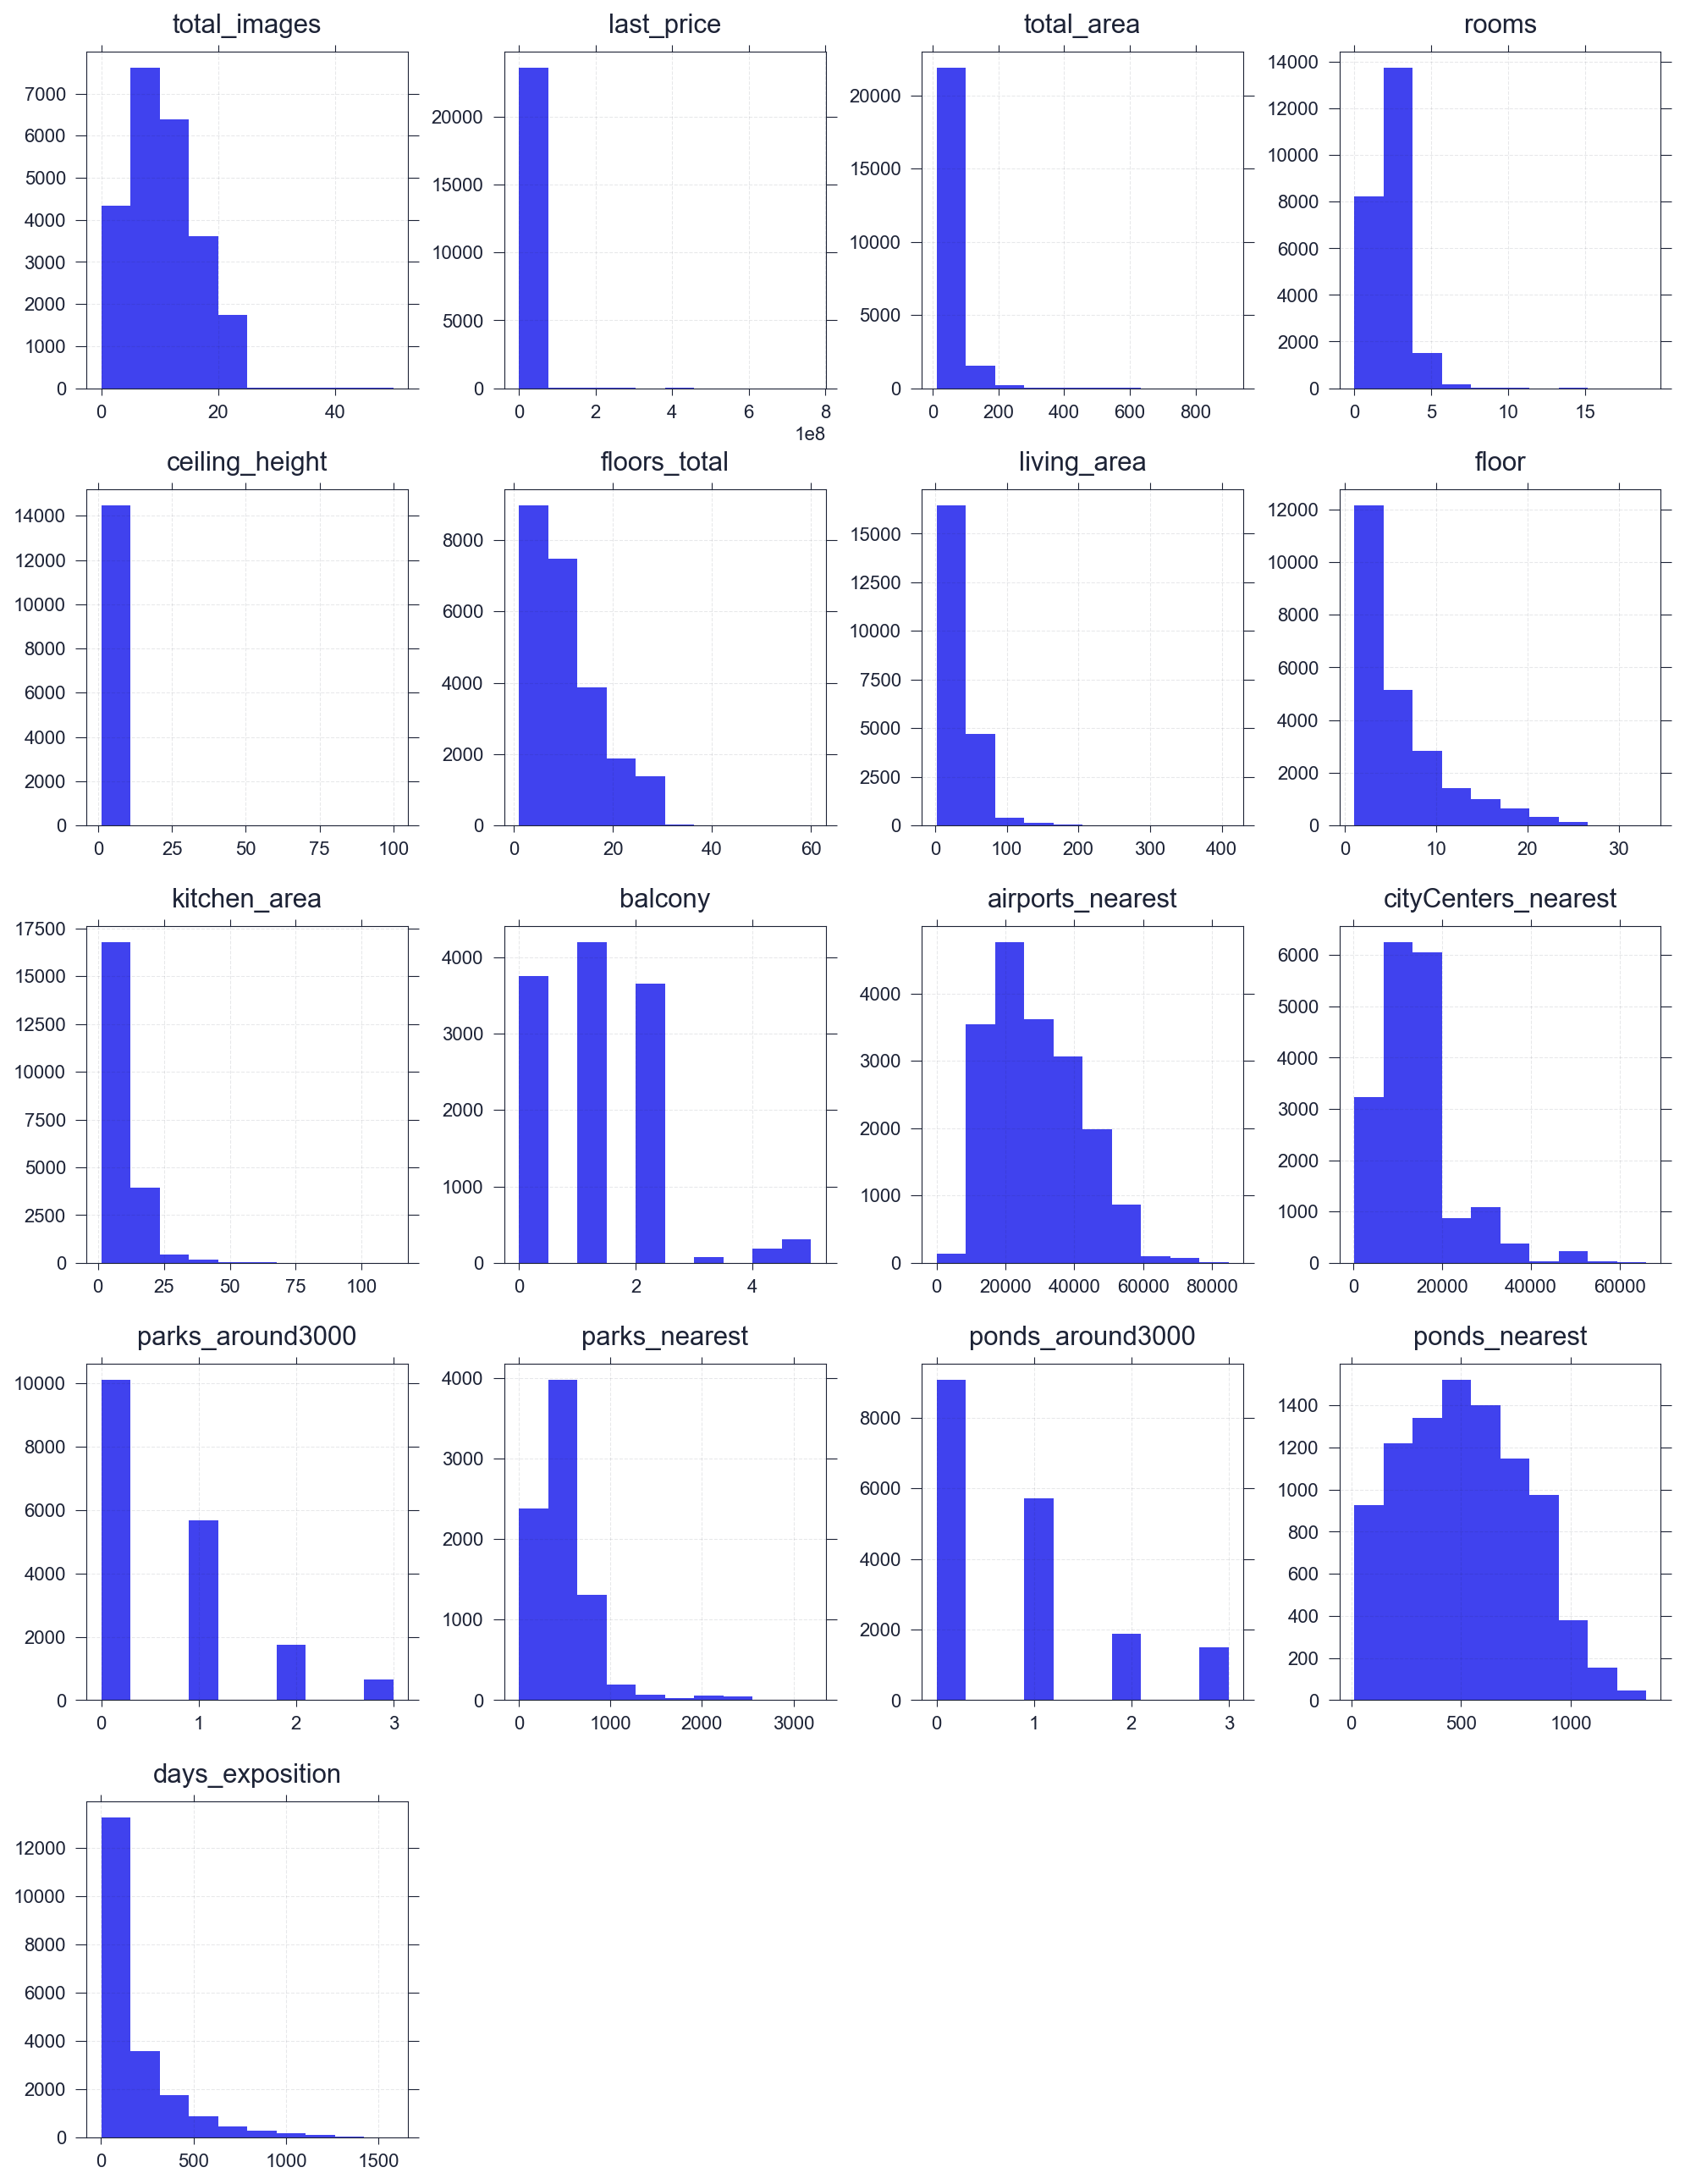

In [5]:
df.hist(figsize=(15, 20))
plt.show()

**Выводы:**
1. Датасет состоит из 23 700 наблюдений и 22 столбцов, причем в 15 столбцах обнаружены пропуски;
2. Информация собиралась двумя способами: часть вписывалась пользователями, часть определялась автоматически;
3. Судя по гистограммам для числовых столбцов датасета, представленная в нем информация на первый взгляд адекватна и рспределения соответствуют ожидаемым, хотя особое внимание привлекает переменная `days_exposition`: некоторые объявления были размещены в течение более чем 3 лет;
4. Первоначально можно предположить, что среди параметров, оказывающих наибольшее влияние на цену квартиры, окажутся следующие:
    * `total_area` — общая площадь квартиры
    * `rooms` — число комнат
    * `cityCenters_nearest` — расстояние до центра города

## 2. Предобработка данных
<a class="anchor" id="2.0"></a>

### 2.1. Пропущенные значения
<a class="anchor" id="2.1"></a>

В датасете обнаружено 15 столбцов с пропусками, причем как среди информации, заполненной пользователями, так и среди информации, заполненной автоматически.

Пропуски имеются в следующих столбцах (общее число и процент):

In [6]:
(
    pd.DataFrame(df.isna().sum()[df.isna().sum() > 0], columns=['count'])
    .join(pd.DataFrame(round(df.isna().sum()[df.isna().sum() > 0] / len(df) * 100, 2), columns=['percent']))
)

,count,percent
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
is_apartment,20924,88.29
kitchen_area,2278,9.61
balcony,11519,48.61
locality_name,49,0.21
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28


Пропуски в столбце `ceiling_height` заполним медианным значением (скорее всего, пользователи просто не хотели указывать стандартную высоту потолков для обычных квартир):

In [7]:
# Выведем медианное значение для проверки на адекватность
print(f'Медианная высота потолка: {df.ceiling_height.median()}')

Медианная высота потолка: 2.65


In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

# Проверяем количество пропусков после замены
df['ceiling_height'].isna().sum()

0

Посмотрим, на каких этажах находятся квартиры с пропусками в переменной `floors_total` (возможно, все эти дома — одноэтажные и квартиры находятся на первом этаже):

In [9]:
df[df.floors_total.isna()]['floor'].value_counts()

floor
4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: count, dtype: int64

Гипотеза не подтвердилась, поэтому заполним пропуски для полного числа самим значением этажа (медиана, равная 9, для этого не подходит)

In [10]:
# Выведем медианное значение для проверки на адекватность
print(f'Медианное число этажей: {df.floors_total.median()}')

Медианное число этажей: 9.0


In [11]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

# Проверяем количество пропусков после замены
df['floors_total'].isna().sum()

0

Разберемся со столбцами `kitchen_area` и `living_area`. В датасете представлен широкий разброс площадей `total_area`, поэтому замена на медианное значение не подойдет:
1. Разделим наблюдения на 3 группы в зависимости от значения площади `total_area`:
   * Группа A: Площадь менее 200 м²
   * Группа B: Площадь 200-400 м²
   * Группа C: Площадь более 400 м²
2. Для каждой из групп найдем отношение медианной площади кухни к медианной полной площади;
3. Заполним пропуски для площади кухни как найденное отношение умножить на значение `total_area`;
4. Жилую площадь `living_area` найдем аналогично как отношение медианной жилой площади к медианной полной площади умножить на значение `total_area`:

In [12]:
# Выведем медианные значение для проверки на адекватность
print(f'Медианная общая площадь: {df.total_area.median()}')
print(f'Медианная жилая площадь: {df.living_area.median()}')
print(f'Медианная площадь кухни: {df.kitchen_area.median()}')

Медианная общая площадь: 52.0
Медианная жилая площадь: 30.0
Медианная площадь кухни: 9.1


In [13]:
# Создадим функцию для определения группы квартиры в зависимости от площади
def area_group_func(row):
    '''
    Функция принимает ряд датасета и возаращет группу наблюдения
    в зависимости от значения площади total_area
    '''
    if row['total_area'] < 200:
        return 'A'
    if row['total_area'] > 400:
        return 'C'
    return 'B'

# Добавим столбец с группами
df['area_group'] = df.apply(area_group_func, axis='columns')

# Проверим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,A
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,A
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,A
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,A
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,A


In [14]:
# Заполним пропуски в столбце kitchen_area
for group in df['area_group'].unique():
    df.loc[df.area_group == group, 'kitchen_area'] = df.loc[df.area_group == group, 'kitchen_area'].fillna(round(df.loc[df.area_group == group, 'total_area'] * df[df.area_group == group].kitchen_area.median() / df[df.area_group == group].total_area.median()))

# Проверяем количество пропусков после замены
df['kitchen_area'].isna().sum()

0

In [15]:
# Заполним пропуски в столбце living_area
for group in df['area_group'].unique():
    df.loc[df.area_group == group, 'living_area'] = df.loc[df.area_group == group, 'living_area'].fillna(round(df.loc[df.area_group == group, 'total_area'] * df[df.area_group == group].living_area.median() / df[df.area_group == group].total_area.median()))

# Проверяем количество пропусков после замены
print(df['living_area'].isna().sum())

0


Пропуски в столбцах `is_apartment` и `balcony` вызваны, очевидно, тем, что квартиры не являются апартаментами (`False`) и не имеют балкона (`0`). Заполним пропуски этими значениями:

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0.)

# Проверяем количество пропусков после замены
print(df['is_apartment'].isna().sum())
print(df['balcony'].isna().sum())

0
0


Посмотрим информацию о данных с пропусками в столбце `locality_name`

In [17]:
df[df['locality_name'].isna()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000,41.000000,41.000000,41.000000,15.000000,41.000000,25.000000,48.000000
mean,8.000000,6.745167e+06,69.799796,2.326531,2.747347,9.55102,40.341224,5.448980,12.113878,0.285714,24572.341463,11278.902439,0.536585,476.733333,1.024390,489.280000,238.645833
std,5.552777,4.496722e+06,30.575956,0.944011,0.254401,7.64052,19.282564,5.784538,7.062237,0.707107,8461.691597,8910.058254,0.839570,179.158137,1.083693,232.420151,190.620542
min,0.000000,1.750000e+06,29.400000,1.000000,2.600000,2.00000,13.000000,1.000000,5.000000,0.000000,10556.000000,1322.000000,0.000000,67.000000,0.000000,142.000000,4.000000
25%,3.000000,3.950000e+06,46.500000,2.000000,2.650000,5.00000,28.000000,2.000000,8.200000,0.000000,21654.000000,4383.000000,0.000000,374.500000,0.000000,374.000000,83.250000
50%,7.000000,5.130593e+06,63.000000,2.000000,2.650000,6.00000,36.600000,3.000000,10.000000,0.000000,22041.000000,8943.000000,0.000000,472.000000,1.000000,374.000000,211.000000
75%,10.000000,8.000000e+06,83.000000,3.000000,2.700000,11.00000,50.800000,6.000000,13.380000,0.000000,25771.000000,17369.000000,1.000000,591.500000,1.000000,603.000000,331.250000
max,20.000000,2.400000e+07,178.300000,4.000000,4.000000,24.00000,103.000000,23.000000,41.600000,4.000000,60195.000000,41294.000000,3.000000,740.000000,3.000000,953.000000,869.000000


Оставим пропуски как есть, чтобы не исказить данные при заполнении.

Перейдем к данным, заполненным автоматически: доля пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` одинакова и составляет 23.3 %. Посмотрим на данные с пропусками:

In [18]:
geo_miss = df.query('airports_nearest.isna() and cityCenters_nearest.isna() and parks_around3000.isna() and ponds_around3000.isna()')

print(f'Число наблюдений с пропусками в автоматичсеких столбцах: {len(geo_miss)}')
geo_miss.head()

Число наблюдений с пропусками в автоматичсеких столбцах: 5518


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,A
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,A
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,A
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,A
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,19.00,2,False,False,False,6.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,A


Можно заметить, что часто пропуски встречаются во всех автоматически заполненных столбцах одновременно (кроме того, число наблюдений с пропусками во всех рассматриваемых столбцах равно числу пропусков в столбце `ponds_around3000`). Возможно, это связано с местоположением квартир?

In [19]:
# Общее число наблюдений по локациям
df.locality_name.value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

In [20]:
# Наблюдения по локациям с пропусками в автоматическом заполнении
geo_miss.locality_name.value_counts()

locality_name
посёлок Мурино          522
Всеволожск              398
Гатчина                 307
деревня Кудрово         299
Выборг                  237
                       ... 
деревня Щеглово           1
посёлок Алексеевка        1
деревня Пельгора          1
поселок Каложицы          1
посёлок Дзержинского      1
Name: count, Length: 344, dtype: int64

Таким образом, можно сделать вывод, что автоматическое заполнение не справляется с квартирами, находящимися вне Санкт-Петербурга: об этом необходимо сообщить разработчикам, предоставляющим данные.

Нет подходящего значения, позволившего бы заполнить эти пропуски, поэтому оставим их.

Доля пропусков в столбцах `parks_nearest` и `ponds_nearest` (расстояния до ближайших парков и прудов) составляет около 66 % и 62 % соответственно — более половины датасета: безболезненно заменить столько пропусков на какие-то конкретные значения не получится.

Посмотрим на данные с пропусками в указанных столбцах:

In [21]:
nearest_miss = df.query('parks_nearest.isna() and ponds_nearest.isna()')

print(f'Число наблюдений с пропусками во всех столбцах с расстроянием: {len(nearest_miss)}')
nearest_miss.head()

Число наблюдений с пропусками во всех столбцах с расстроянием: 11334


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,A
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,A
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,A
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,41.00,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,A
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,A


Очевидно, что если для какого-нибудь наблюдения значения в столбцах `parks_around3000` и `ponds_around3000` пропущены, то пропуски будут и в столбцах `park_nearest` и `pond_nearest` также будут пропущены:

In [22]:
# Число пропусков равно числу пропусков в столбце 'parks_around3000'
nearest_miss.query('parks_around3000.isna() and ponds_around3000.isna()').shape[0]

5518

Посмотрим на значения в столбцах `ponds_around3000` и `parks_around3000` для наблюдений с указанными пропусками:

In [23]:
print(nearest_miss.ponds_around3000.value_counts())
print(nearest_miss.parks_around3000.value_counts())

ponds_around3000
0.0    5816
Name: count, dtype: int64
parks_around3000
0.0    5816
Name: count, dtype: int64


Получается, пропуски в столбцах `parks_nearest` и `ponds_nearest` означают, что значения в столбцах `ponds_around3000` и `parks_around3000` либо пропущены, либо равны 0.

Пропуски в столбце `days_exposition` означают, что квартира не продана. Эти пропуски заполнять не будем.

Оценим число пропусков после заполнения:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выводы:**
1. В целом, доля пропусков в столбцах, заполненных пользователями вручную, невелика (выделяются лишь столбцы `ceiling_height` — 39 % пропусков, `is_apartment` — 88 %, и `balcony` — 49 %);
2. Пропуски в таких столбцах появились, скорее всего, по причине человеческого фактора: напрмеир, пользователи не указали число балконов при их отстутсвии или не посчитали важной для заполнения информацию о площади кухни;
3. Такие пропуски логично заменить на 0 (для отсутствующих балконов), медианное значение или, как например в столбцах `living_area` и `kitchen_area`, использовать более сложный подход;
4. Иначе дело обстоит со столбцами, заполненными автоматически: в них число пропусков велико и составляет от 23 % до 66 % во всех столбцах, что свидетельствует об очевидных ограничениях системы автоматического определения параметров;
5. Анализ показал, что применение геосервисов не позволяет автоматически определить необходимую информаицю для квартир, находящихся за пределами Санкт-Петербурга;
6. Кроме того, пропуски в столбцах `parks_nearest` и `ponds_nearest` означают, что значения в столбцах `ponds_around3000` и `parks_around3000` либо пропущены, либо равны 0;
7. Логичную замену для пропусков в столбцах, заполненных автоматически, предложить невозможно, как и для пропусков в столбце `locality_name`,поэтому пропуски в них были оставлены без изменений;
8. Пропуски в столбце `days_exposition` означают, что квартира не продана: эти пропуски были оставлены.

### 2.2. Преобразование типов данных
<a class="anchor" id="2.2"></a>

Оценим тип данных `type` для всех столбцов:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Целесообразно произвести замену типов данных в следующих столбцах:
1. К типу данных `int8` (целые числа меньше 127):
    * столбцы `total_images`, `rooms` и `floor` с текущим типом `int64`, что позволит уменьшить размер датасета;
    * столбцы `floors_total` и `balcony` с текущим типом `float64`;    
   
   
2. К типу данных `int16` (целые числа меньше 32767):
    * столбец `days_exposition` с текущим типом `float64`, что также позволит уменьшить размер датасета
    
    
3. К типу данных `datetime` (дата и время):
    * столбец `first_day_exposition`, что позволит производить с данными в этом столбце операции как со строковым типом, а как со специальным типом данных pandas

In [26]:
# Приводим к типу int8
df['total_images'] = df['total_images'].astype('int8')
df['rooms'] = df['rooms'].astype('int8')
df['floor'] = df['floor'].astype('int8')
df['balcony'] = df['balcony'].astype('int8')
df['floors_total'] = df['floors_total'].astype('int8')

# Приводим к типу int16
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')
# df['days_exposition'] = df['days_exposition'].astype('int16')

# Приводим к типу datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим результат:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Вывод**: Преобразование типов данных позволило не только использовать более подходящие для каждого столбца типы данных, но также уменьшить размер датафрейма от 3.5 MB до 2.9 MB.

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,A
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,A
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,A
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,92.0,9,False,False,False,28.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,A
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,A


### 2.3. Устранение дубликатов
<a class="anchor" id="2.3"></a>

Значительное число дубликатов встречается в столбце `locality_name`:

In [29]:
print(f'Число уникальных значений до удаления дубликатов: {len(df.locality_name.unique())}')

Число уникальных значений до удаления дубликатов: 365


Избавимся от явных дубликатов с помощью цепочки методов `replace()`:

In [30]:
df['locality_name'] = (
    df['locality_name'].str
    .replace('ё', 'е')
    .replace('городской', '')
    .replace('городского типа', '')
)

Проверим число уникальных знчений после удаления дубликатов:

In [31]:
print(f'Число уникальных значений после удаления дубликатов: {len(df.locality_name.unique())}')

Число уникальных значений после удаления дубликатов: 331


**Вывод**: После удаления дубликатов число уникальных значений сократилось от 364 до 330.

## 3. Добавление новых столбцов
<a class="anchor" id="3.0"></a>

Добавим в датасет столбцы со следующими параметрами:
1. `sq_m_price`: цена одного квадратного метра;
2. `week_day`: день недели публикации (0 — понедельник, 1 — вторник и т. д.);
3. `month`: месяц публикации;
4. `year`: год публикации;
5. `floor_type`: тип этажа квартиры («‎первый», «последний» или «другой»);
6. `city_centers_km`: расстояние до центра города в километрах.

Также заменим название столбца `cityCenters_nearest` на `city_centers_nearest`

In [32]:
# изменим название столбца cityCenters_nearest
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [33]:
# Функция для создания столбца floor_type
def floor_type_func(row):
    '''Функция применяется к строке и возвращает `floor_type`
    в виде«‎первый», «последний» или «другой»'''
    if row['floor'] == 1:
        return('первый')
    if row['floor'] == row['floors_total']:
        return('последний')
    return 'другой'

df['sq_m_price'] = round(df['last_price'] / df['total_area'], 2)
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['floor_type'] = df.apply(floor_type_func, axis='columns')
df['city_centers_km'] = round(df['city_centers_nearest'] / 1000)

Проверим результат:

In [34]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,A,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,A,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,A,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,92.0,9,False,False,False,28.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,A,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,A,100000.00,1,6,2018,другой,8.0


**Вывод:** Замена столбцов произведена корректно

## 4. Исследовательский анализ данных
<a class="anchor" id="4.0"></a>

### 4.1. Работа с аномалиями
<a class="anchor" id="4.1"></a>

Построим гистограммы для столбцов `total_area`, `living_area`, `kitchen_area`, `last_price`, `rooms`, `ceiling_height`, `floor_type`, `floors_total`, `city_centers_nearest` и `parks_nearest`, чтоб оценить распределение признаков и проверить их на наличие аномалий.

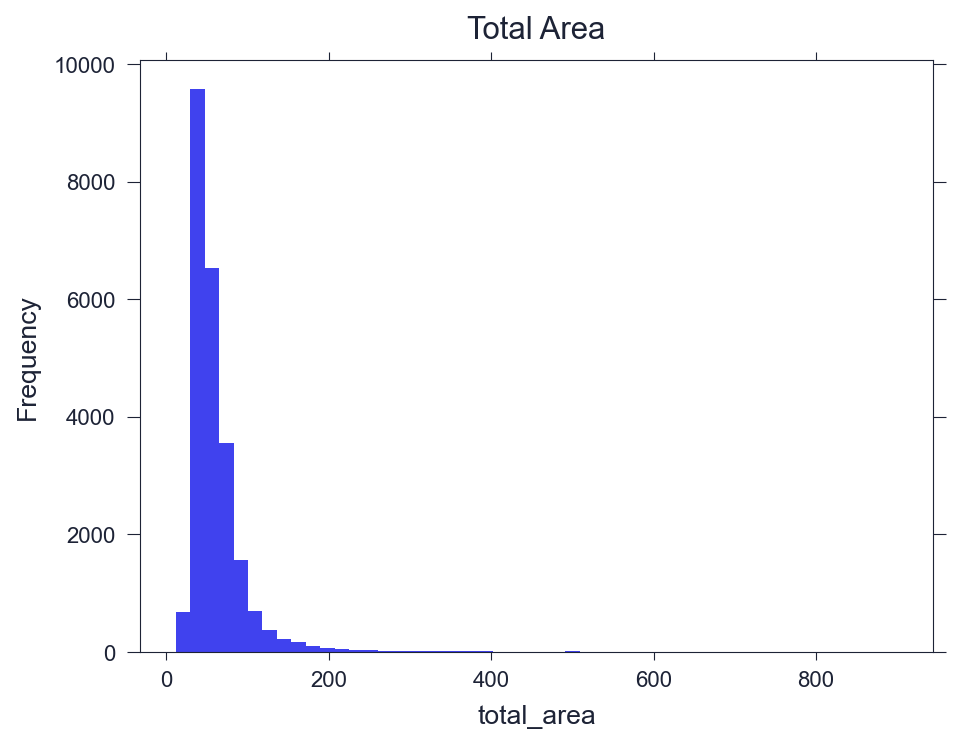

In [35]:
df['total_area'].plot(y='total_area', kind='hist', grid=False, bins=50,
                      title='Total Area', xlabel='total_area')
plt.show()

In [36]:
print(f'Минимальное значение: {df.total_area.min()} м²')
print(f'Максимальное значение: {df.total_area.max()} м²')

Минимальное значение: 12.0 м²
Максимальное значение: 900.0 м²


Для столбца `total_area` рапсределение, в целом, соответствует ожидаемому. Минимальная площадь составляет 12 м², а максимлаьное — 900 м², причем основная доля наблюдений находится на промежутке 20-170 м².

Рассмотрим распределение переменной на промежутке 200-900 м²:

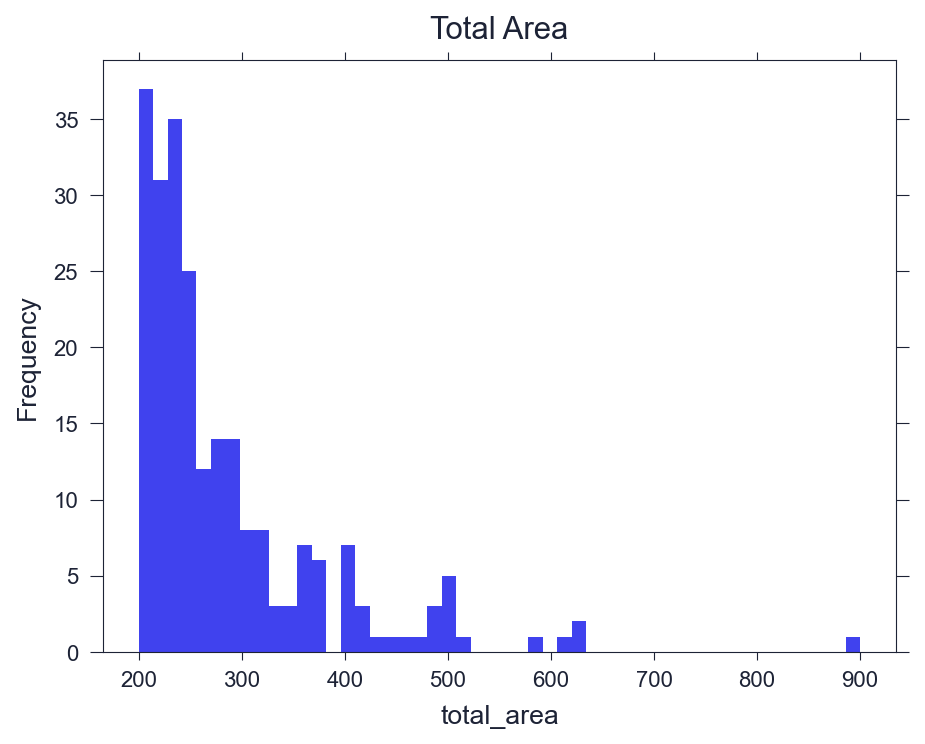

In [37]:
df['total_area'].plot(y='total_area', kind='hist', grid=False, bins=50,
                      range=(200, 900),
                      title='Total Area', xlabel='total_area')
plt.show()

Как и ожидалось, значения на этом промежутке постепенно уменьшаются без значительных аномалий. Единственный возможный выброс — квратира с площадью 900 м². Рассмотрим это и блихкие к нему наблюдения:

In [38]:
pd.set_option('display.max_columns', 50)
df[df.total_area > 500].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078,C,165680.47,3,12,2015,последний,6.0
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4,332.0,3,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,<NA>,C,96711.80,5,10,2017,другой,2.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,C,110169.49,3,2,2019,другой,5.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111,C,485436.89,0,12,2017,другой,5.0
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,359.0,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,<NA>,C,221870.05,5,3,2019,последний,5.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,<NA>,C,221799.75,1,4,2019,последний,5.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,C,466666.67,2,12,2017,последний,8.0


Данные вполне адекватны: квартира с площадью 900 м² имеет соответствующую кухню (112 м²) и 12 комнат и была продана за 420 000 000 руб. Тем не менее, поскольку данное наблюдение значительно отличается от остальных, удалим его для корректности дальнейшего анализа

In [39]:
# Удаляем строку
df = df.drop(19540)

# Проверяем, у какого наблюдения теперь наибольшая площадь
df[df.total_area > 500].sort_values(by='total_area').tail(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,<NA>,C,221799.75,1,4,2019,последний,5.0


Ожидаем, что распределения по столбцам `living_area` и `kitchen_area` будут аналогичны рассмотренному:

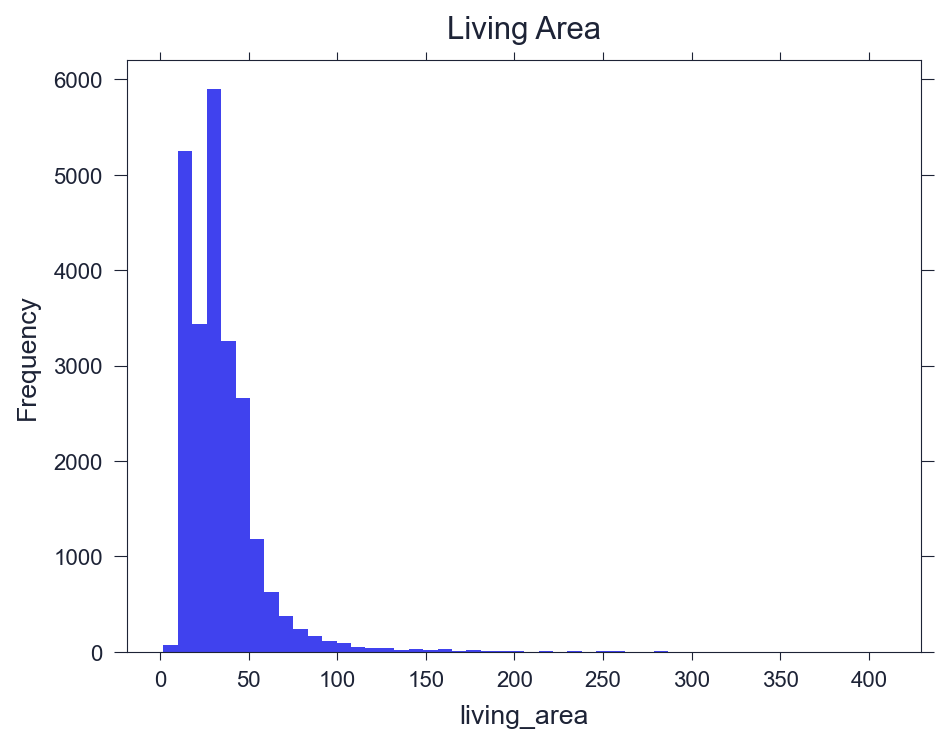

Минимальное значение: 2.0 м²
Максимальное значение: 409.0 м²


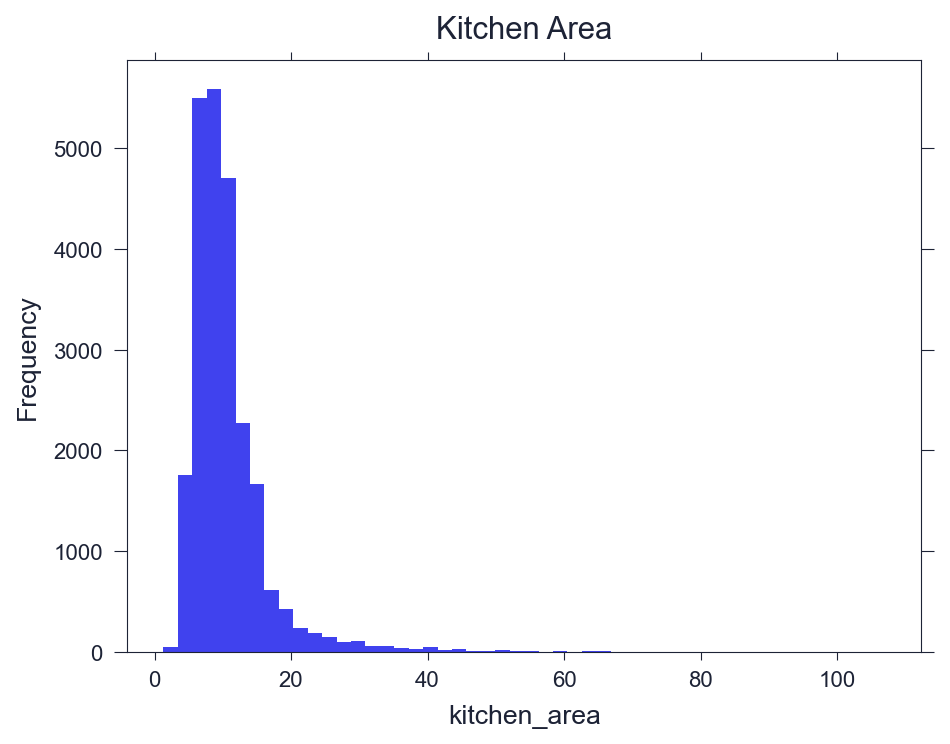

Минимальное значение: 1.3 м²
Максимальное значение: 107.0 м²


In [40]:
df['living_area'].plot(y='living_area', kind='hist', grid=False, bins=50,
                      title='Living Area', xlabel='living_area')
plt.show()
print(f'Минимальное значение: {df.living_area.min()} м²')
print(f'Максимальное значение: {df.living_area.max()} м²')

df['kitchen_area'].plot(y='kitchen_area', kind='hist', grid=False, bins=50,
                      title='Kitchen Area', xlabel='kitchen_area')
plt.show()
print(f'Минимальное значение: {df.kitchen_area.min()} м²')
print(f'Максимальное значение: {df.kitchen_area.max()} м²')

В целом распределения соответстсвуют наблюдаемому ранее: присутствуют как квартиры с очень маленькими значеняими площади (жилая площадь 2 м² и площадь кухни 1.3 м²), так и обчень большие квартиры (уже известная квартира с жилой площадью 571 м² и площадью кухни 112 м²).

В основном все наблюдения сконцентрированы в интервалах 10-90 м² для общей площади и 5-15 м² для площади кухни.

Рассмотрим распределение переменныхй на промежутках 100-571 м² и 25-112 м² соответственно:

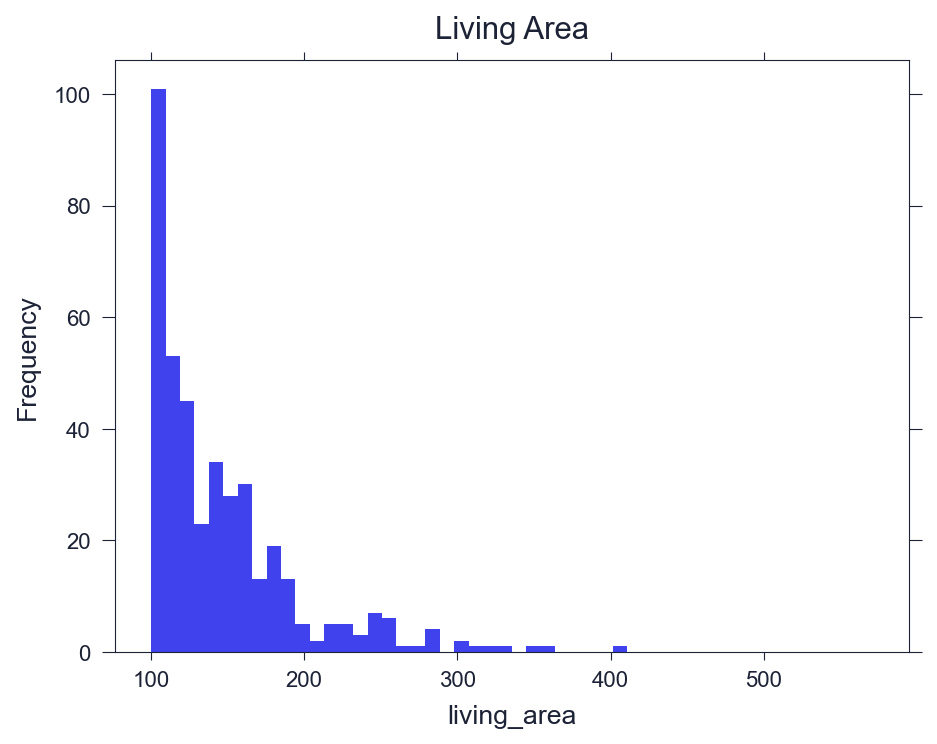

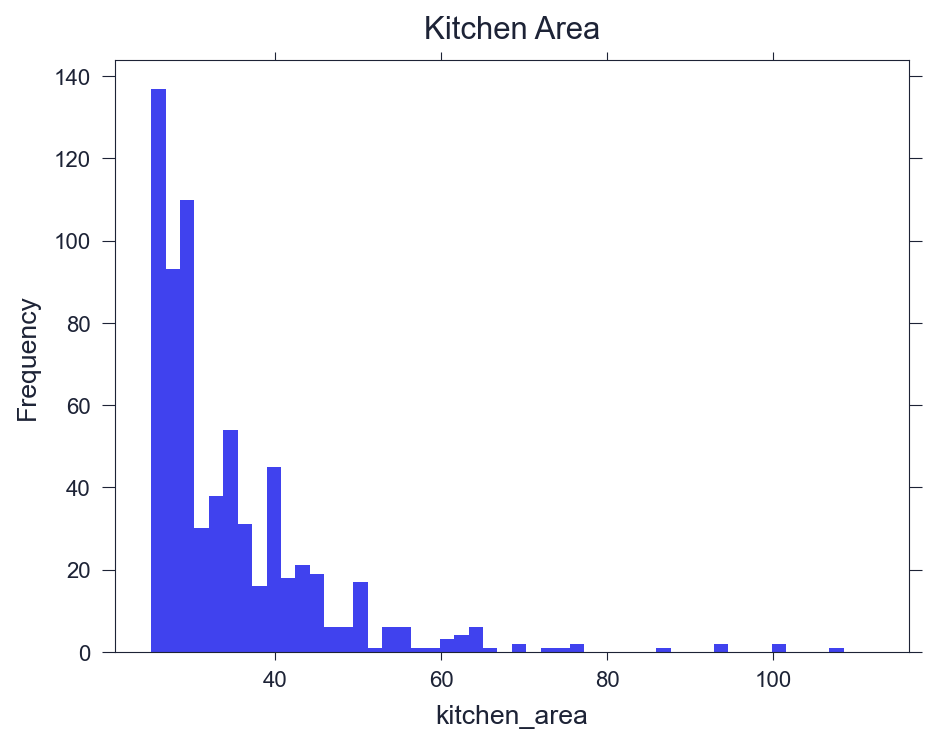

In [41]:
df['living_area'].plot(y='living_area', kind='hist', grid=False, bins=50,
                      range=(100, 571),
                      title='Living Area', xlabel='living_area')
plt.show()

df['kitchen_area'].plot(y='kitchen_area', kind='hist', grid=False, bins=50,
                      range=(25, 112),
                      title='Kitchen Area', xlabel='kitchen_area')
plt.show()

Как и ожидалось, значения на этом промежутке постепенно уменьшаются без значительных аномалий. Ожидаем, что квартиры с общей жилой площадью больше 400 м² — это уже знакомые нам квартиры с большой площадью `total_area`, причем им же будут соовтетсвовать значения площади кухни порядка 90-112 м²:

In [42]:
df[df.living_area > 400].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,C,110169.49,3,2,2019,другой,5.0


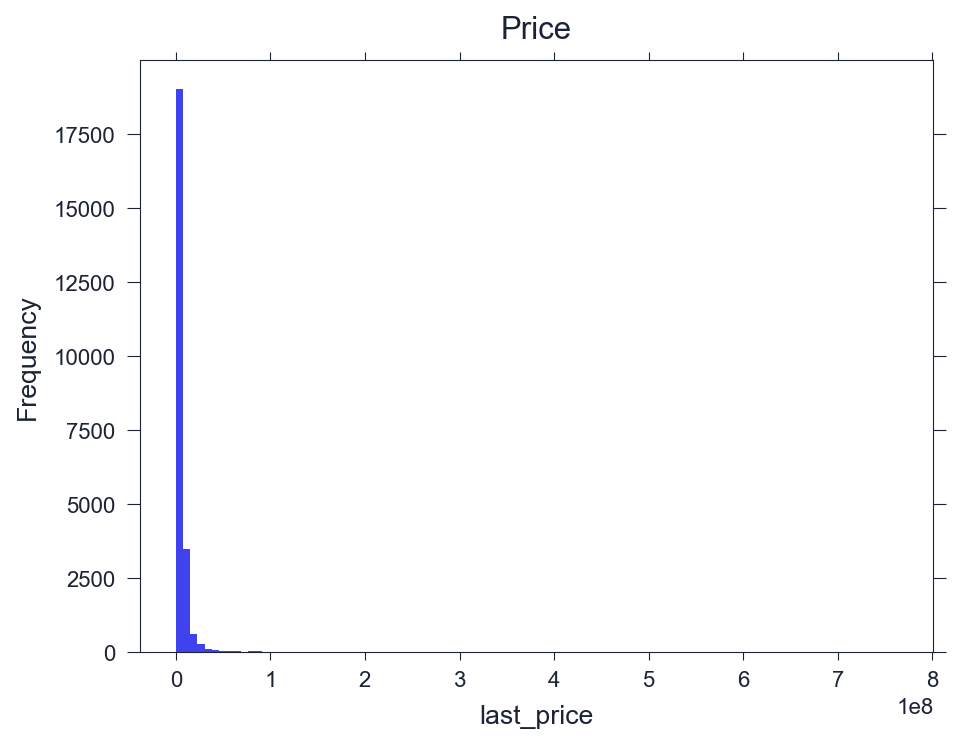

Минимальное значение: 12190.0 руб
Максимальное значение: 763000000.0 руб


In [43]:
df['last_price'].plot(y='last_price', kind='hist', grid=False, bins=100,
                      title='Price', xlabel='last_price')
plt.show()
print(f'Минимальное значение: {df.last_price.min()} руб')
print(f'Максимальное значение: {df.last_price.max()} руб')

Цены разбросаны в диапазоне от 12 000 до 763 000 000 руб. Посмотрим на наблюдения, расположившиеся по краям

In [44]:
df.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,A,111.83,2,3,2019,последний,9.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,A,14144.74,0,4,2019,первый,NaN
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,31.0,3,False,False,False,9.0,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44,A,7962.96,1,6,2018,последний,NaN
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,23.0,1,False,False,False,7.0,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45,A,11000.00,1,7,2018,первый,NaN
17676,0,450000.0,36.5,2018-02-01,1,2.65,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120,A,12328.77,3,2,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,<NA>,A,1542604.80,1,3,2019,последний,1.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111,C,485436.89,0,12,2017,другой,5.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233,A,1736842.11,2,4,2018,другой,1.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393,C,1000748.13,5,2,2016,последний,2.0


Квартира стоимостью 12 000 руб выглядит сомнительно, учитывая, что ее площадь составляет 109 м². Удалим это наблюдение:

In [45]:
# Удаляем наблюдение
df = df.drop(8793)

# Проверяем, какое наблюдение теперь с наименьшей ценой
df.sort_values(by='last_price').head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,A,14144.74,0,4,2019,первый,NaN


Построим гистаграмму для оценки распределения цены для квартир дороже 50 000 000 руб (по оси х — цена квартиры в млн руб):

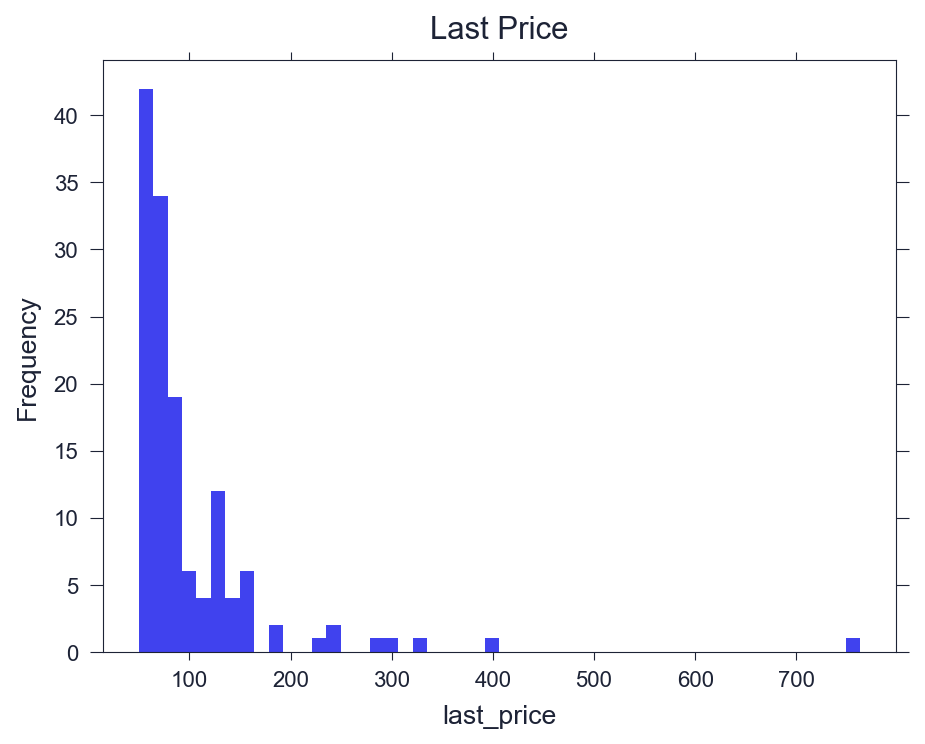

In [46]:
(df['last_price'] / 1000000).plot(kind='hist', grid=False, bins=50,
                      range=(50, 763),
                      title='Last Price', xlabel='last_price')
plt.show()

Квартира стоимостью 763 000 000 руб обладает значительной ценой за квадратный метр, даже по сравнению с другими наиболее дорогими квартирами. Тем не менее, учитывая расстояние до центра в 4 км, будем считать, что данное наблюдение правдоподобно.

Тем не менее, для корректности дальнейшего анализа, удалим квартиры с ценой более 250 000 000 руб (по оси х — цена квартиры в млн руб):

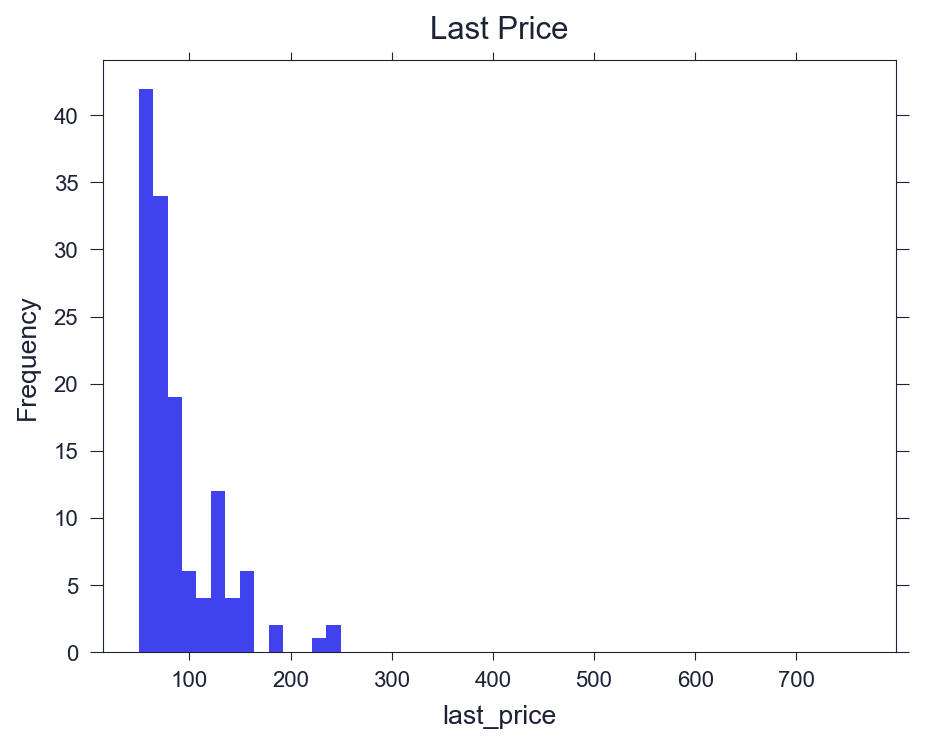

In [47]:
# Удаляем наблюдения
df = df[df.last_price < 250000000]

# Оцениваем распределение
(df['last_price'] / 1000000).plot(kind='hist', grid=False, bins=50,
                      range=(50, 763),
                      title='Last Price', xlabel='last_price')
plt.show()

Построим гистограмму для распределения признака `rooms`

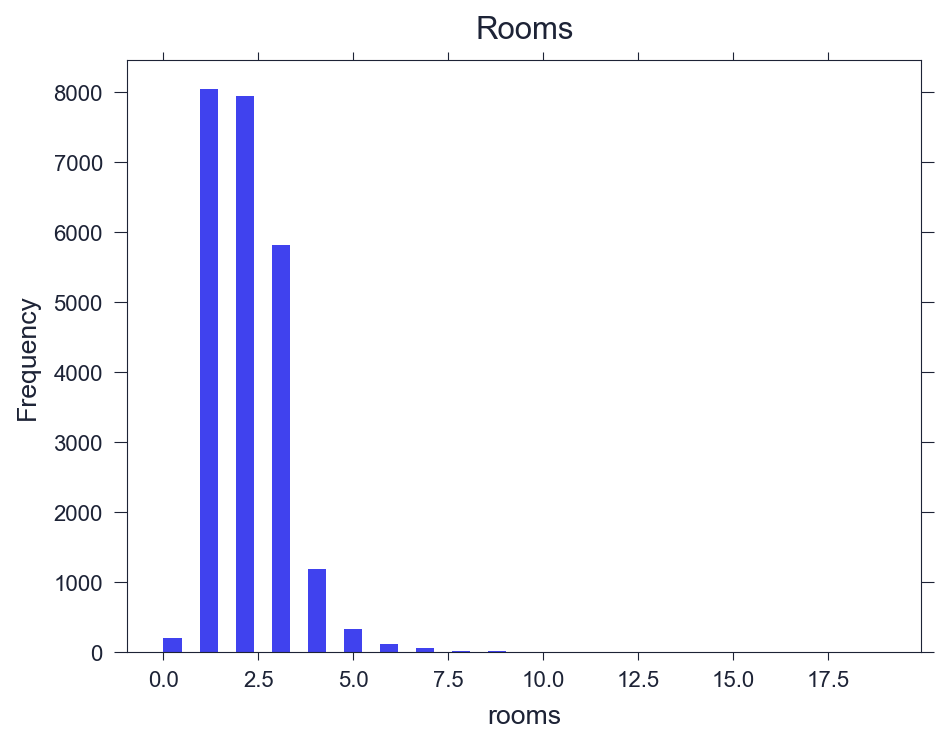

Минимальное значение: 0
Максимальное значение: 19


In [48]:
df['rooms'].plot(y='rooms', kind='hist', grid=False, bins=40,
                      title='Rooms', xlabel='rooms')
plt.show()
print(f'Минимальное значение: {df.rooms.min()}')
print(f'Максимальное значение: {df.rooms.max()}')

In [49]:
df.sort_values(by='rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
7237,8,2999000.0,42.63,2017-11-27,0,2.65,16,25.7,2,False,False,True,7.0,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,A,70349.52,0,11,2017,другой,NaN
11051,2,2200000.0,26.00,2017-10-24,0,2.65,21,12.0,21,False,False,True,5.0,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,35,A,84615.38,1,10,2017,последний,NaN
21628,9,3900000.0,34.00,2017-03-18,0,2.65,20,24.0,10,False,False,True,6.0,2,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320,A,114705.88,5,3,2017,другой,14.0
19917,5,2340000.0,25.41,2017-09-29,0,2.65,25,18.5,13,False,False,True,4.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,3,A,92089.73,4,9,2017,другой,NaN
12737,10,2300000.0,20.50,2018-07-01,0,2.65,25,15.5,13,False,True,False,4.0,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,30,A,112195.12,6,7,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,5,25000000.0,363.00,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418,B,68870.52,5,12,2017,другой,8.0
20829,6,28659000.0,245.40,2016-03-31,14,2.65,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95,B,116784.84,3,3,2016,другой,2.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,C,110169.49,3,2,2019,другой,5.0
18848,6,28500000.0,270.00,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365,B,105555.56,0,3,2015,последний,4.0


В основном число комнат сконцентрировано в промежутке 1-4, однако встречаются и аномальные нулевые значения. Построим диаграмму рассеивания (зависимость цены от числа комнат), а также гистограмму распределения для числа комнат более 5:

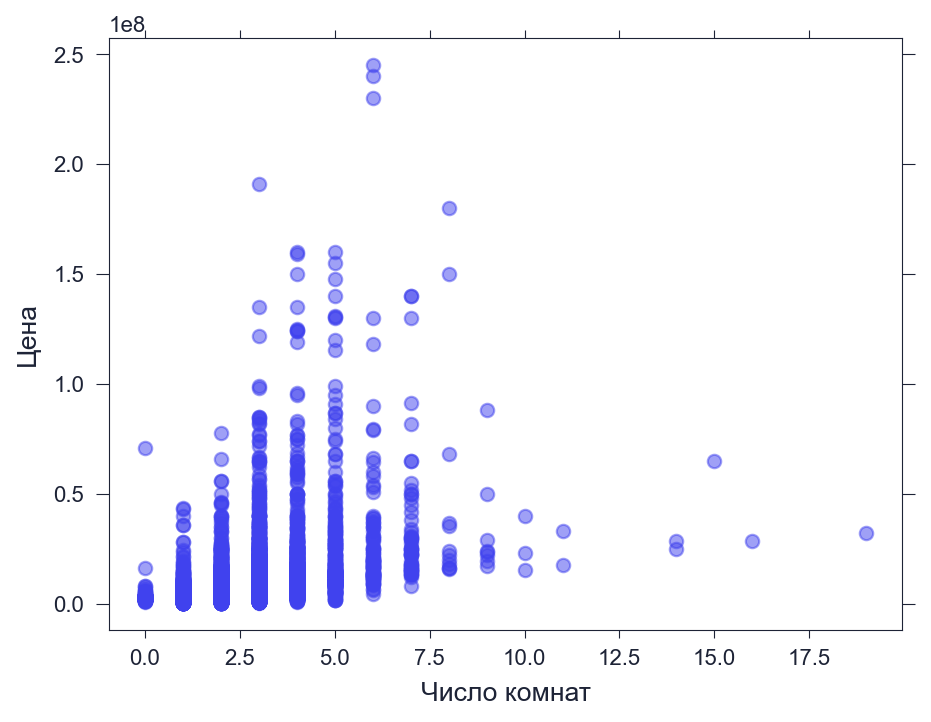

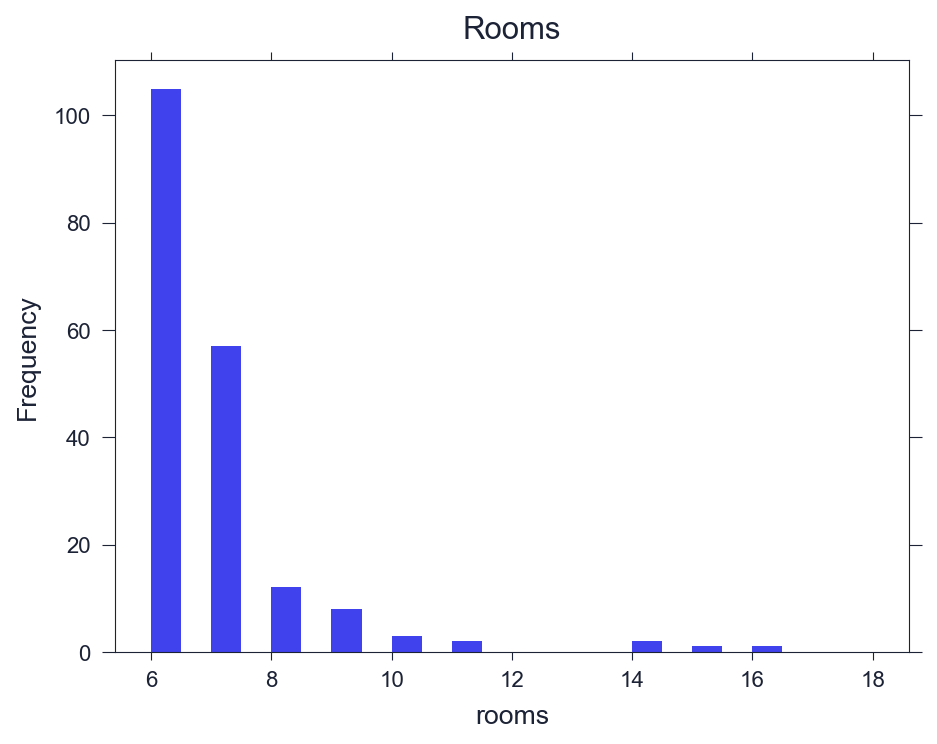

In [50]:
plt.scatter(x=df.rooms, y=df.last_price, alpha=0.5)
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

df['rooms'].plot(y='rooms', kind='hist', grid=False, bins=24,
                      range=(6, 18),
                      title='Rooms', xlabel='rooms')
plt.show()

Судя по диаграмме, нулевые значения можно заменить на 1; также избавимся от 7 наблюдений с аномально большим числом комнат более 10:

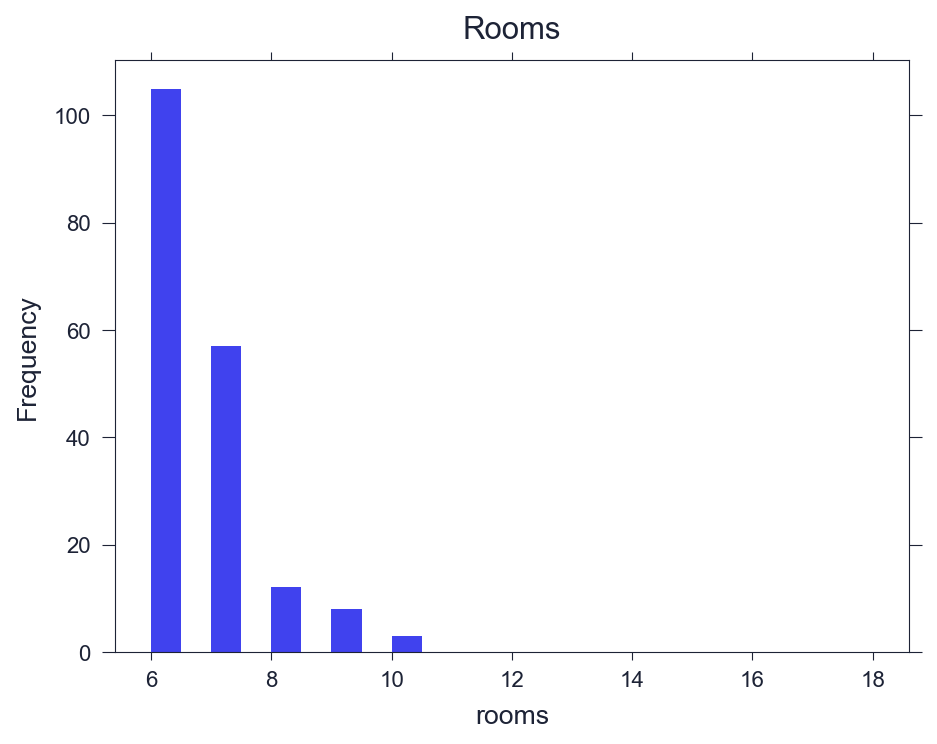

In [51]:
# Заменяем 0 на 1
df.loc[df.rooms == 0, 'rooms'] = 1

# Удаляем аномально большие значения
df = df[df.rooms < 11]

# Проверяем распределение
df['rooms'].plot(y='rooms', kind='hist', grid=False, bins=24,
                      range=(6, 18),
                      title='Rooms', xlabel='rooms')
plt.show()

Построим гистограмму для распределения признака `ceiling_height`:

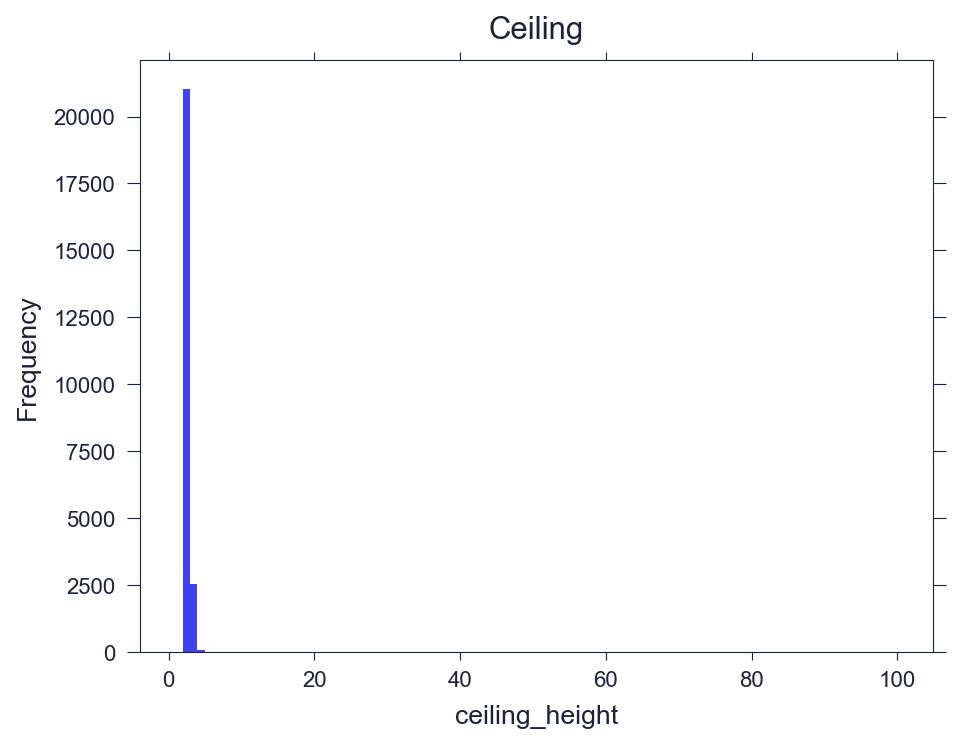

Минимальное значение: 1.0 м
Максимальное значение: 100.0 м


In [52]:
df['ceiling_height'].plot(y='ceiling_height', kind='hist', grid=False,
                          bins=100, title='Ceiling', xlabel='ceiling_height')
plt.show()
print(f'Минимальное значение: {df.ceiling_height.min()} м')
print(f'Максимальное значение: {df.ceiling_height.max()} м')

In [57]:
df.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,sq_m_price,week_day,month,year,floor_type,city_centers_km
22590,16,6000000.0,55.00,2018-10-31,2,1.00,12,32.4,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13,A,109090.91,2,10,2018,другой,14.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.5,1,False,False,False,5.20,0,городской поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248,A,35046.73,0,8,2017,первый,NaN
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71,A,102500.00,1,10,2017,другой,20.0
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.6,9,False,False,False,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36,A,59836.30,0,12,2017,другой,NaN
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.0,4,False,False,False,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,A,38709.68,3,12,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,17,8150000.0,80.00,2019-01-09,2,27.00,36,41.0,13,False,False,False,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38,A,101875.00,2,1,2019,другой,20.0
21377,19,4900000.0,42.00,2017-04-18,1,27.50,24,37.7,19,False,False,False,11.00,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61,A,116666.67,1,4,2017,другой,10.0
3148,14,2900000.0,75.00,2018-11-12,3,32.00,3,53.0,2,False,False,False,8.00,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,A,38666.67,0,11,2018,другой,NaN
22336,19,9999000.0,92.40,2019-04-05,2,32.00,6,55.5,5,False,False,False,16.50,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,<NA>,A,108214.29,4,4,2019,другой,4.0


Из гистограммы видно, что для подавляющего большинства наблюдений высота потолков имеет адекватное значение порядка 2-3 м, однако в распределении присутствуют аномалии.

Высота потолков 1, 1.2 и 1.75 метров — ниже среднего роста человека. Удалим эти наблюдения, а таже наблюдение со значением высоты 100:

In [53]:
df = df.drop([22590, 5712, 16934, 22869])

Оценим распределение высоты потолков со значениями больше 3.5:

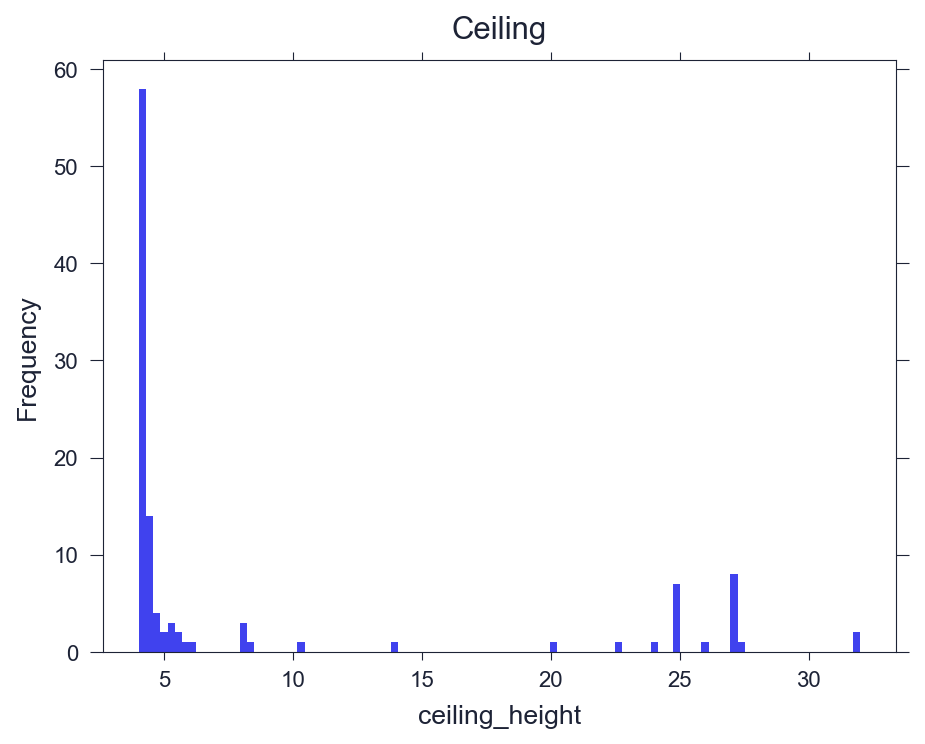

In [54]:
df['ceiling_height'].plot(y='ceiling_height', kind='hist',
                          grid=False, bins=100, range=(4, 32),
                          title='Ceiling', xlabel='ceiling_height')
plt.show()

Очевидно, в данных ошибка: логично заменить значения высоты потолков более 18 м на эти же значения, деленные на 10:

In [55]:
# Производим замену
df.loc[df.ceiling_height > 18, 'ceiling_height'] = df.loc[df.ceiling_height > 18, 'ceiling_height'] / 10

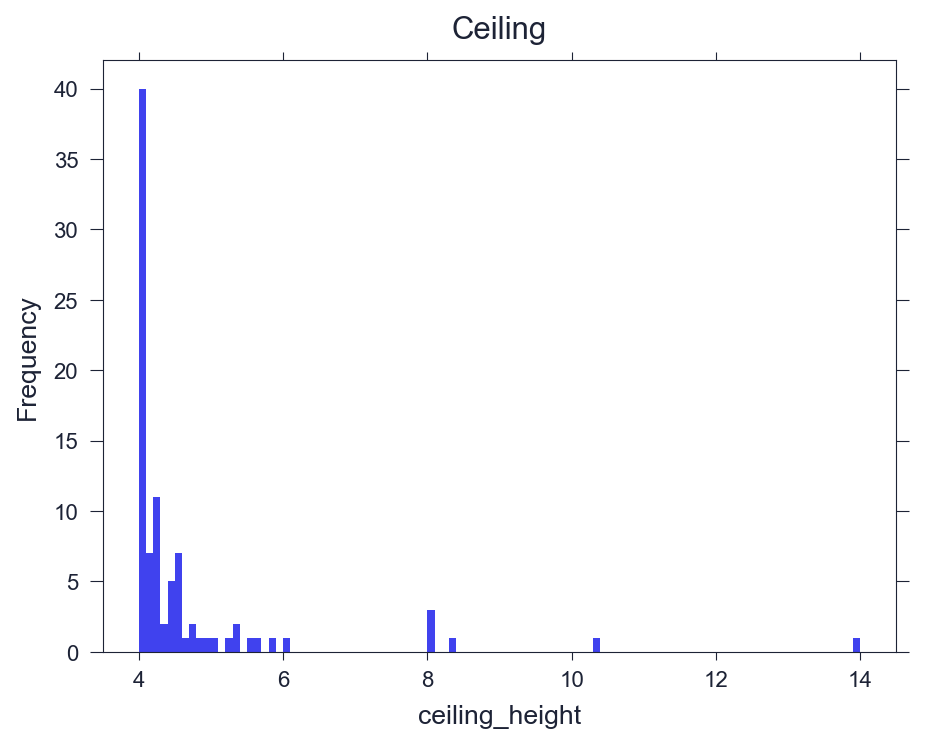

In [56]:
# Оцениваем распределение после замены
df['ceiling_height'].plot(y='ceiling_height', kind='hist',
                          grid=False, bins=100, range=(4, 14),
                          title='Ceiling', xlabel='ceiling_height')
plt.show()

Значения больше 5 м — явные выбросы. Удалим их:

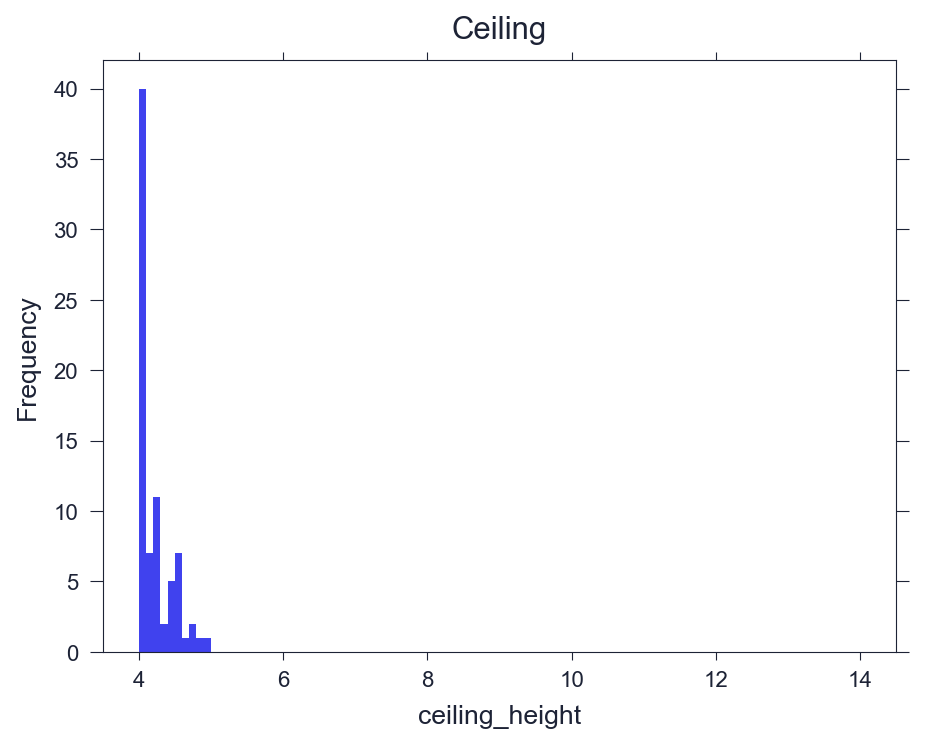

In [57]:
# Удаляем значения
df = df[df.ceiling_height < 5]

# Оцениваем распределение
df['ceiling_height'].plot(y='ceiling_height', kind='hist',
                          grid=False, bins=100, range=(4, 14),
                          title='Ceiling', xlabel='ceiling_height')
plt.show()

Рассмотрим распределение для типа этажа квартиры:

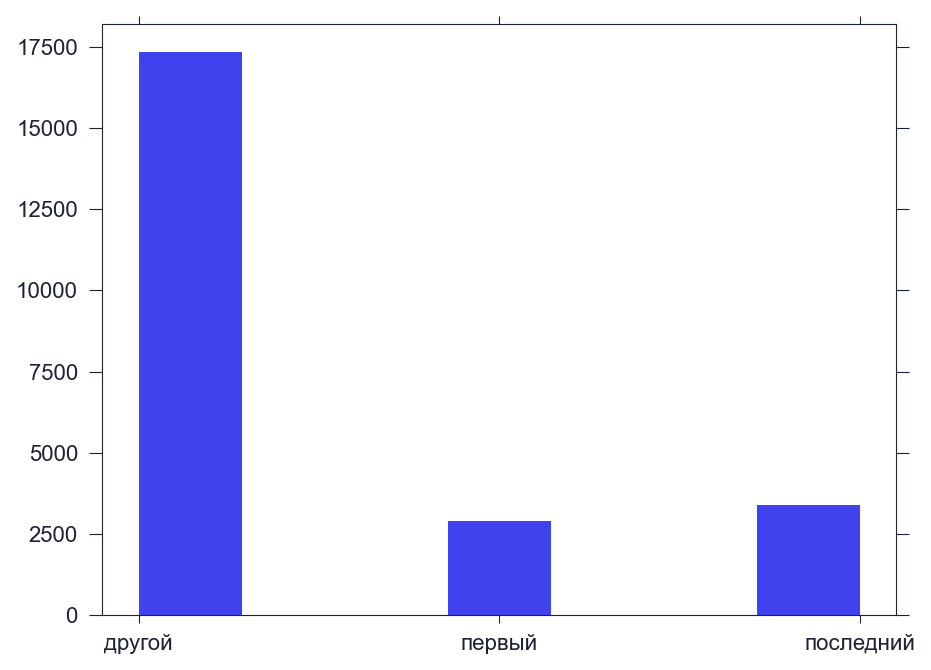

In [58]:
df['floor_type'].hist(grid=False, bins=7)
plt.show()

Как и ожидалось, абсолютное большинство квартир расположены не на первом и не на пследнем этажах. Число квартир, расположенных на первом или последнем этажаж, примерно равно и их доли от общего числа квартир составляет приблизительно по 10 % для каждого типа.

Рассмотрим распределение для общего числа этажей в доме:

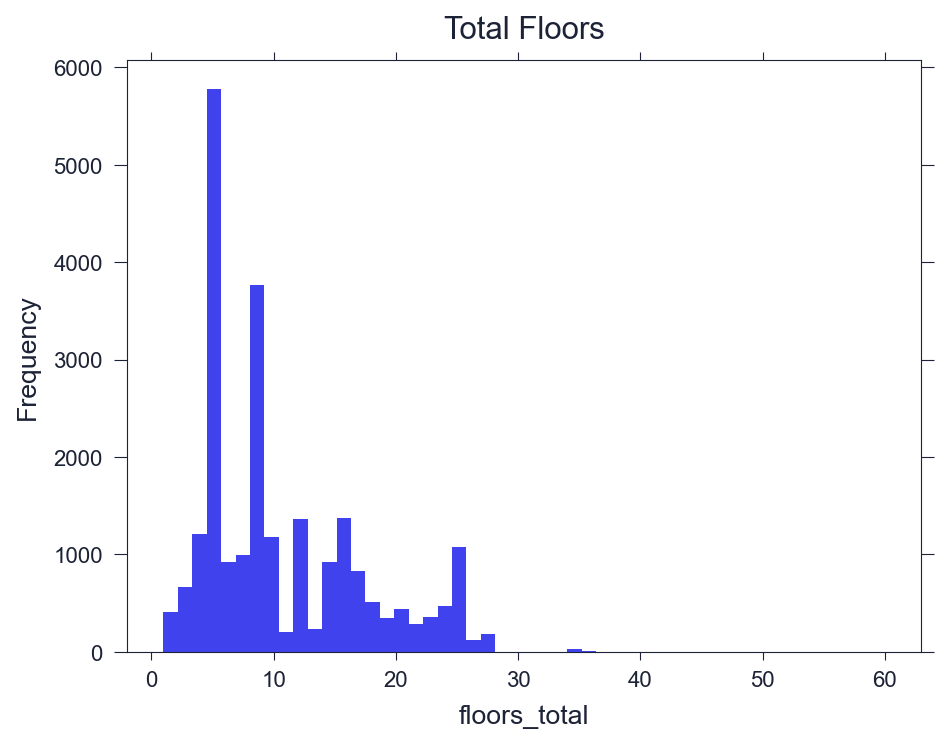

Минимальное значение: 1
Максимальное значение: 60


In [59]:
df['floors_total'].plot(y='floors_total', kind='hist', grid=False, bins=50,
                      title='Total Floors', xlabel='floors_total')
plt.show()
print(f'Минимальное значение: {df.floors_total.min()}')
print(f'Максимальное значение: {df.floors_total.max()}')

Удалим значения больше 30 как аномальные:

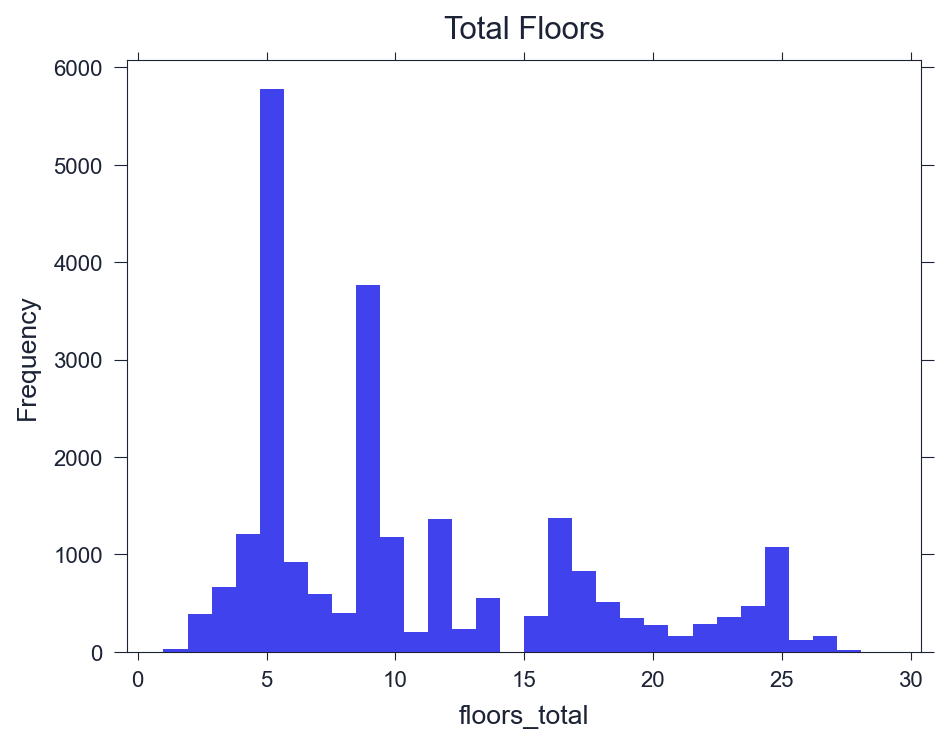

Минимальное значение: 1
Максимальное значение: 29


In [60]:
# Удаляем аномалии
df = df[df.floors_total < 30]

# Смотрим, что получилось
df['floors_total'].plot(y='floors_total', kind='hist', grid=False, bins=30,
                      title='Total Floors', xlabel='floors_total')
plt.show()
print(f'Минимальное значение: {df.floors_total.min()}')
print(f'Максимальное значение: {df.floors_total.max()}')

Теперь данные выглядят более прадоподобными: в основном число этажей — от 5 до 25, причем больше всего квартир — в пятиэтажных и девятиэтажных домах.

Рассмотрим распределение для расстояния до центра города в метрах:

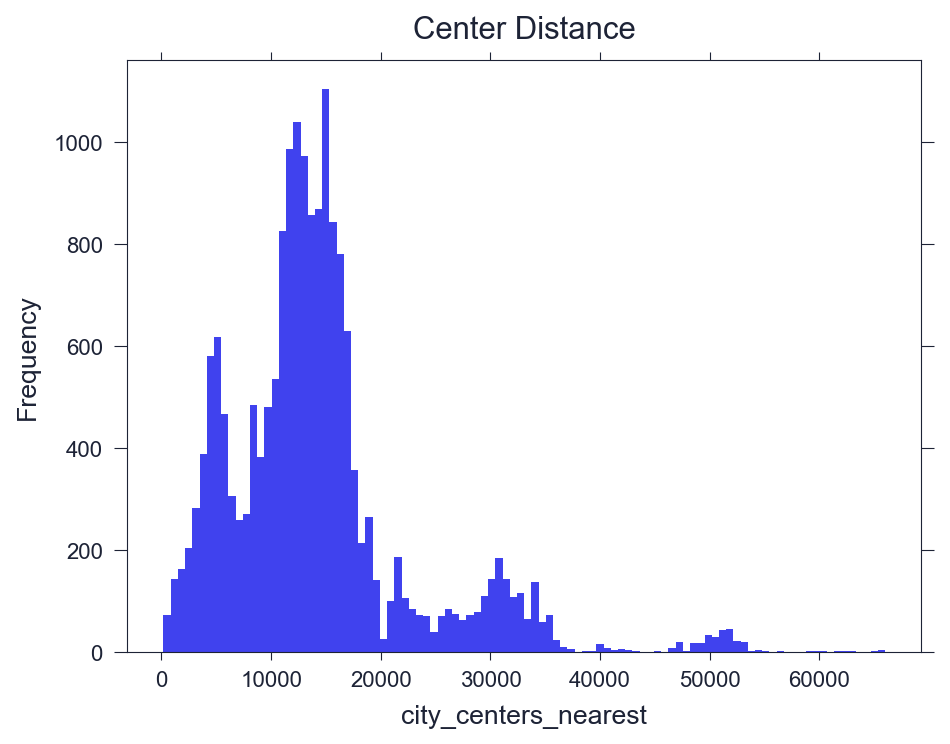

Минимальное значение: 181.0 м
Максимальное значение: 65968.0 м


In [61]:
df['city_centers_nearest'].plot(y='city_centers_nearest', kind='hist', 
                                grid=False, bins=100,
                      title='Center Distance', xlabel='city_centers_nearest')
plt.show()
print(f'Минимальное значение: {df.city_centers_nearest.min()} м')
print(f'Максимальное значение: {df.city_centers_nearest.max()} м')

Распределение выглядит правдоподобным: больше всего квартир продавалось в пределах 20 км от центра города; наименьшее значение расстояния — 181 м, а наибольшее — 66 км.

Рассмотрим распределение для расстояния до ближайшего парка в метрах:

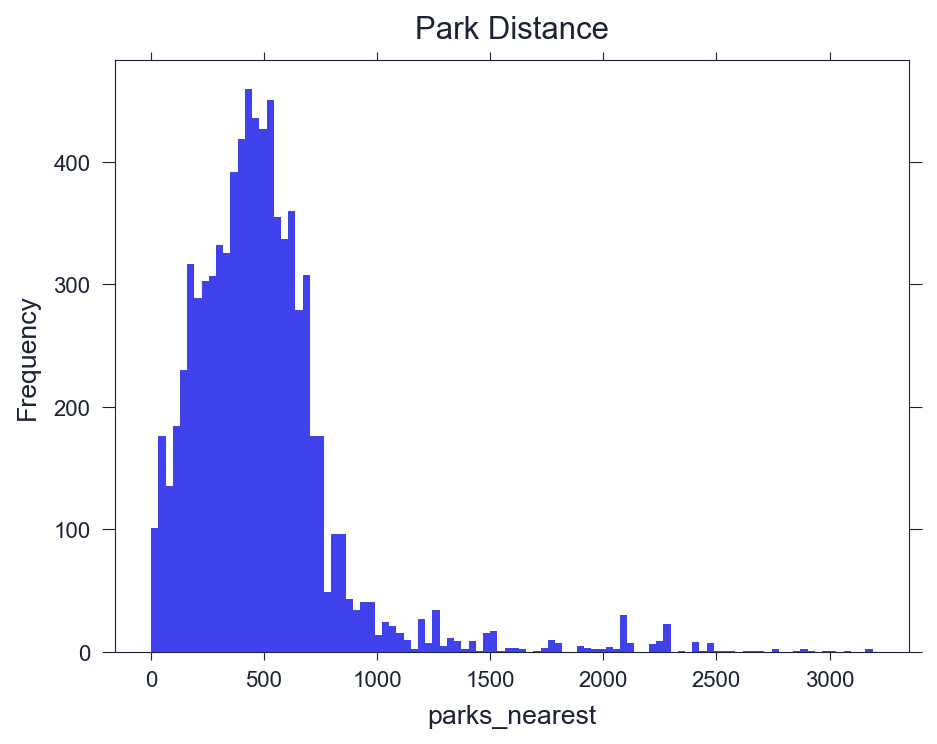

Минимальное значение: 1.0 м
Максимальное значение: 3190.0 м


In [62]:
df['parks_nearest'].plot(y='parks_nearest', kind='hist', 
                                grid=False, bins=100,
                      title='Park Distance', xlabel='parks_nearest')
plt.show()
print(f'Минимальное значение: {df.parks_nearest.min()} м')
print(f'Максимальное значение: {df.parks_nearest.max()} м')

Распределение выглядит правдоподобным: для большинства квартир расстояние до ближайшего парка не превышает 1 км; наименьшее значение расстояния — 1 м, а наибольшее — 30 км.

In [63]:
print(f'Число наблюдений после удаления аномалий: {df.shape[0]}')

Число наблюдений после удаления аномалий: 23636


**Выводы:**
1. Была произведена работа с аномальными значениями, которые в основном были удалены, за исключением столбцов:
    * `rooms`, где нулевые значения были заменены на 1;
    * `ceiling_height`, где аномальные значения более 18 м были уменьшены в 10 раз (а аномалии меньше 18 м были удалены)
2. После удаления аномалий число наблюдений датасета уменьшилось на 63, что составляет около 0.3 % размера оригинального датасета.

### 4.2. Насколько быстро продавались квартиры
<a class="anchor" id="4.2"></a>

Параметр `days_exposition` показывает, сколько дней было размещено каждое объявление. Построим гистограмму:

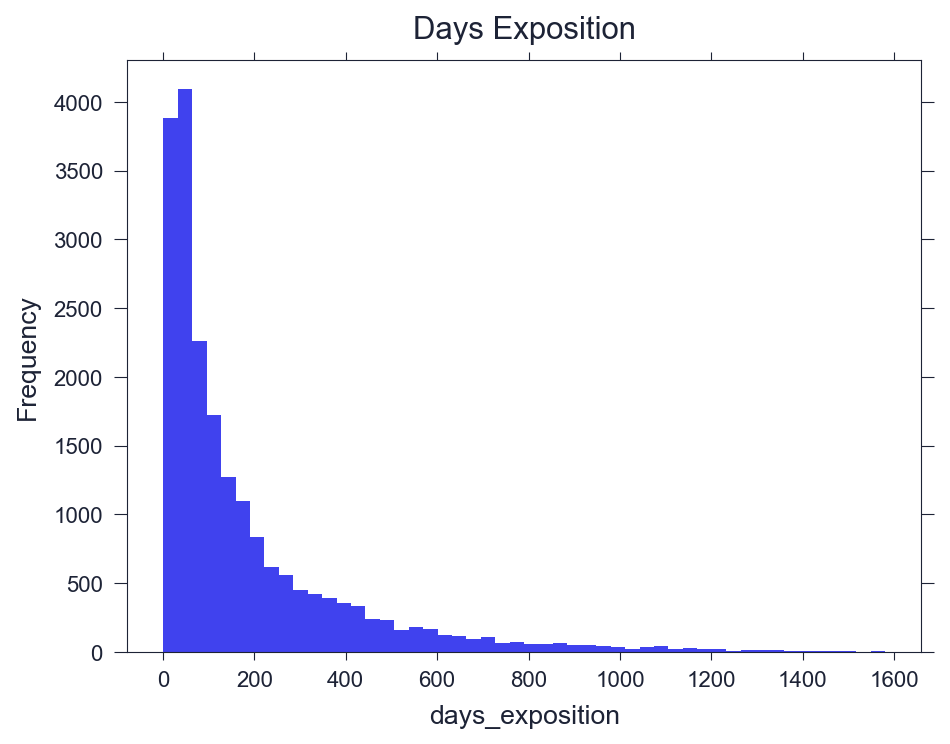

In [64]:
df['days_exposition'].plot(y='days_exposition', kind='hist', 
                           grid=False, bins=50,
                           title='Days Exposition', xlabel='days_exposition')
plt.show()

РАссмотрим также распределение для длительности менее 200 дней:

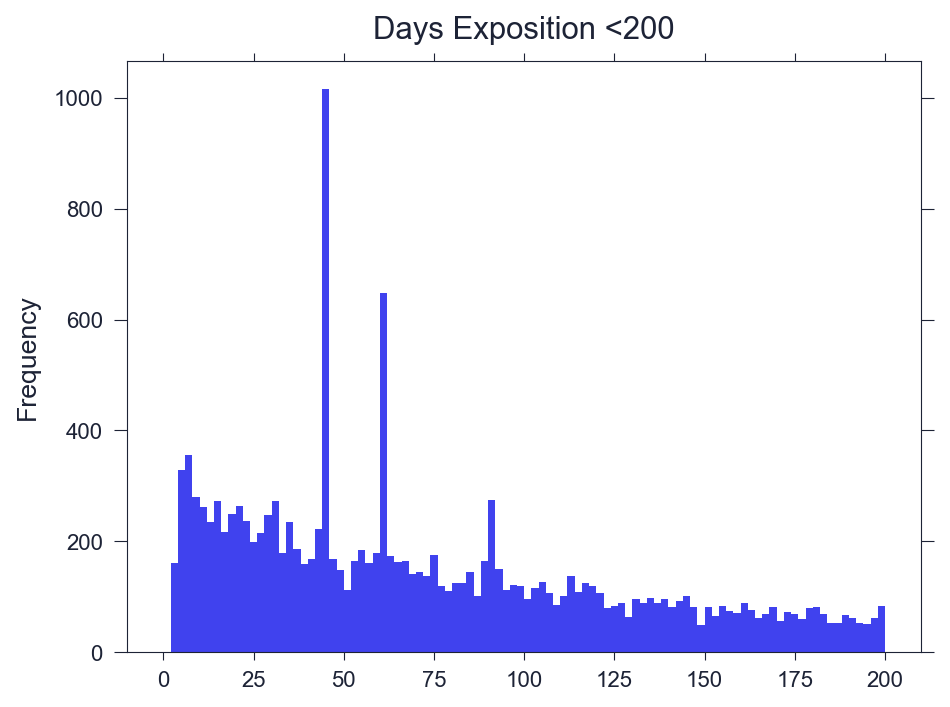

In [65]:
df['days_exposition'].plot(y='days_exposition', kind='hist', 
                           range=(0, 200), grid=False, bins=100,
                           title='Days Exposition <200')
plt.show()

Общий тренд — послепенное уменьшение числа длительно размещенных объявлений. На гистограмме видны три пика: около 45, 65 и 95 дней: последнее из значений — рассчитанная ранее при осуществлении замены медиана, на которую были заменены около 3000 пропусков.

Возможно, эти пики связаны с тем, что объявления закрываются автоматически через 45 или 60 дней со времени публикации.

Рассчитаем среднее и медиану, а также рассмотрим общую статистику по столбцу:

In [66]:
print(f'Средняя продолжительность продажи: {round(df.days_exposition.mean())} дней')
print(f'Медианная продолжительность продажи: {round(df.days_exposition.median())} дней')
df.days_exposition.describe()

Средняя продолжительность продажи: 181 дней
Медианная продолжительность продажи: 95 дней


count       20466.0
mean     180.800352
std      219.622883
min             1.0
25%            45.0
50%            95.0
75%           231.0
max          1580.0
Name: days_exposition, dtype: Float64

**Выводы**:
1. Медианное значение длительности размещения объявления составляет 95 дней, а среднее — 169 дней со стандартным отклонением 206.4;
2. Судя по гистограмме, в среднем, продажа квартиры занимает около 150 дней;
3. 25 % объявлений снимаются через 45 дней: такие продажи можно считать быстрыми;
4. 75 % объявлений снимаются через 200 дней: такие продажи можно считать долгими;
5. Максимальная продолжительность продажи — 1580 дней, т. е. боле 4 лет.

### 4.3. Факторы, влияющие на стоимость
<a class="anchor" id="4.3"></a>

На данном шаге изучим зависимость общей стоимости квартиры от следующих факторов:
* `total_area` — общая площадь;
* `living_area` — жилая площадь;
* `kitchen_area` — площадь кухни;
* `floor_type` — тип этажа;
* `week_day`, `month` и `year` — дата размещения.

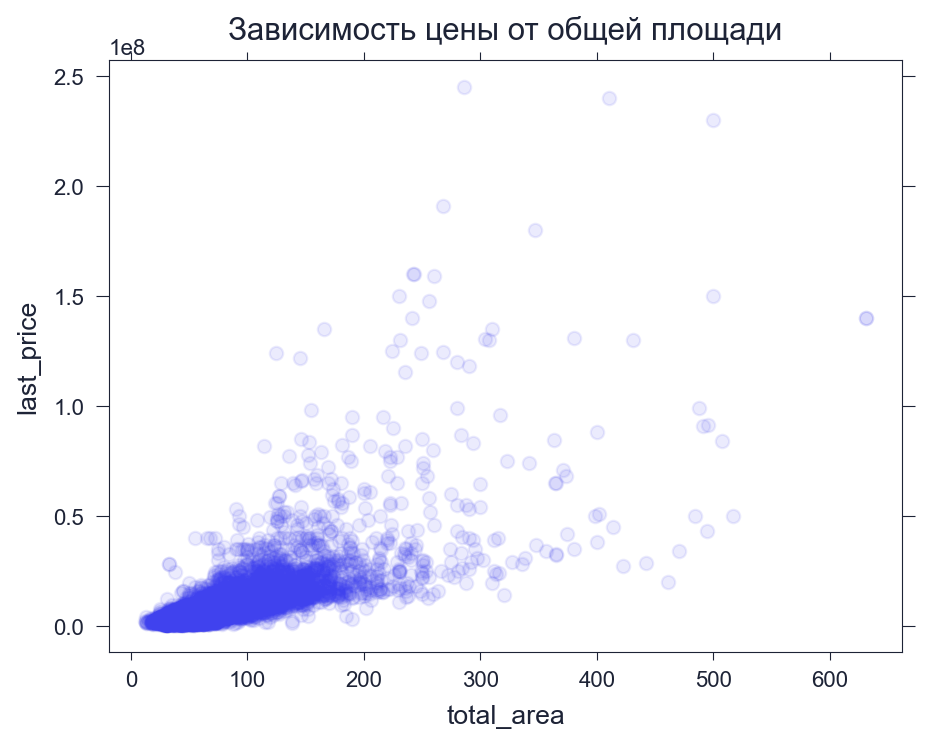

In [67]:
# Построим диаграмму рассеяния для общей площади
plt.scatter(x=df.total_area, y=df.last_price, alpha=0.1)
plt.xlabel('total_area')
plt.ylabel('last_price')
plt.title('Зависимость цены от общей площади')
plt.show()

Как следует из диаграммы рассеяния, подавляющее большинство квартир имеют площадь до 200 м² и цену до 50 000 000 руб.

Кроме того, связь между общей площадью и ценой близка к линейной: чем квартира больше, тем она и дороже. Такую зависимость можно аппроксимировать с помощью прямой:

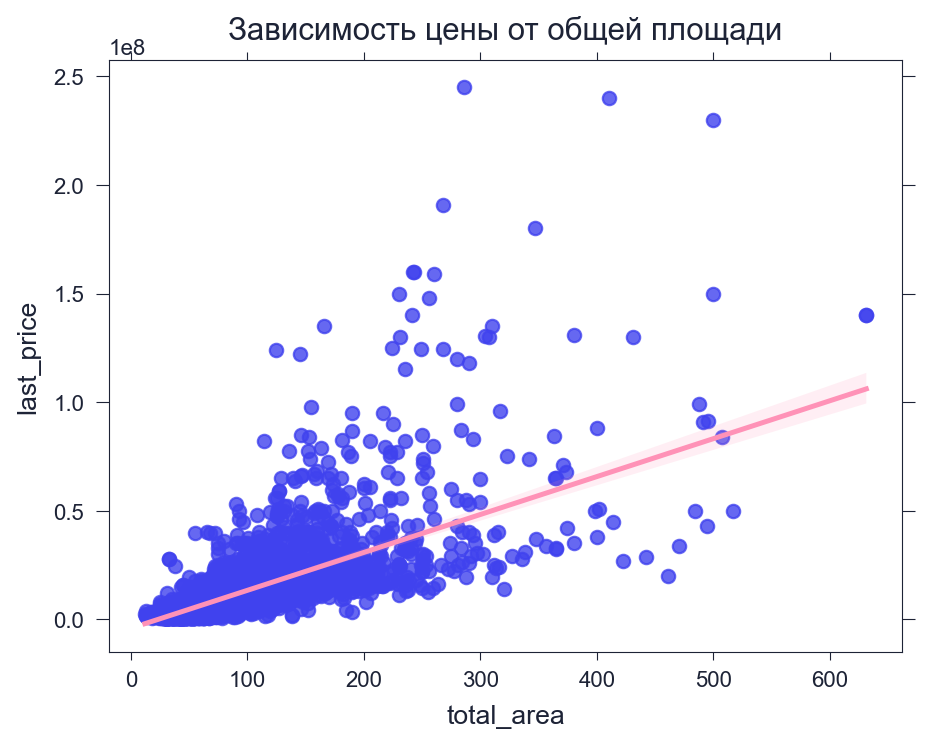

In [68]:
sns.regplot(x=df.total_area, y=df.last_price, line_kws=dict(marker=',', color='#FF92B7'))
plt.title('Зависимость цены от общей площади')
plt.show()

Применим регрессионную модель:

In [69]:
# Создаем модель
model = sf.ols('last_price ~ total_area', df).fit()

# Отображаем информацию по модели
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             last_price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 2.738e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:37:10   Log-Likelihood:            -4.0073e+05
No. Observations:               23636   AIC:                         8.015e+05
Df Residuals:                   23634   BIC:                         8.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.087e+06   7.31e+04    -55.892      0.000   -4.23e+06   -3.94e+06
total_area  1.746e+05   1055.250    165.459      0.000    1.73e+05    1.77e+05
==============================================================================
Omnibus:                    39793.926   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66017045.484
Skew:                          11.269   Prob(JB):                         0.00
Kurtosis:                     260.926   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Таким образом, получена регрессионная модель с коэффициентом slope = 1.7 $\times$ 10^5 со значением p-value значительно меньше 0.05, что свидетельствует о статистической значимости полученного результата (отвергаем нулевую гипотезу об отсутствии линейной связи мпежду параметрами).

Интерпретация: при единичном увеличении площади общая цена квартиры увеличивается на 170 000 руб

Далее произведем аналогичный анализ для других признаков (причем ожидаем, что зависимость для параметров `living_area` и `kitchen_area` будет аналогична рассмотренной, поскольку эти параметры, очевидно, взаимосвязаны):

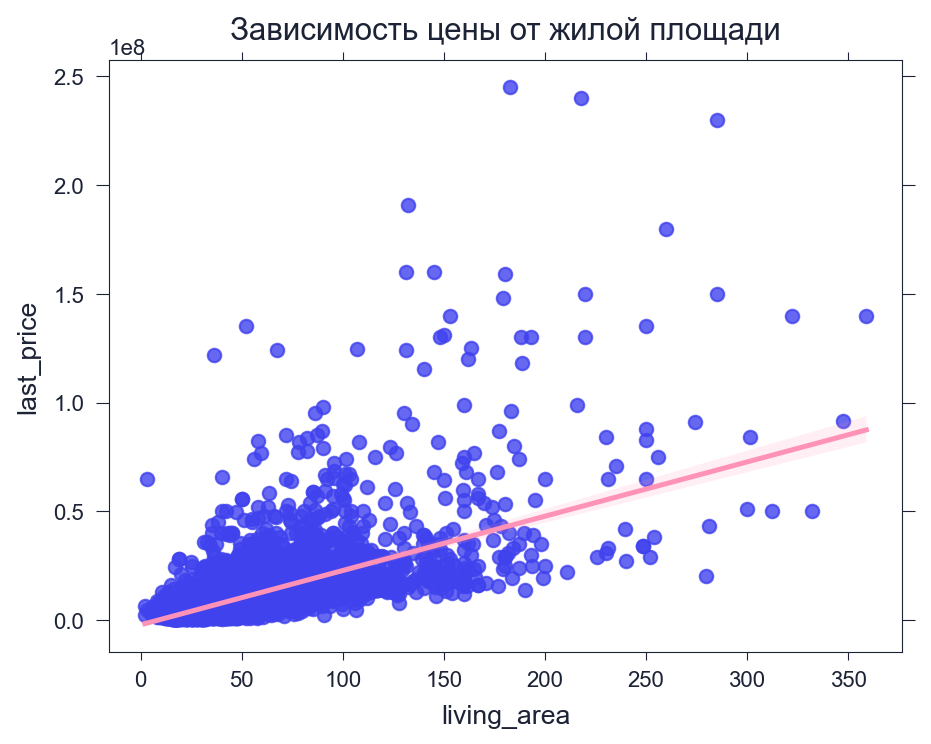

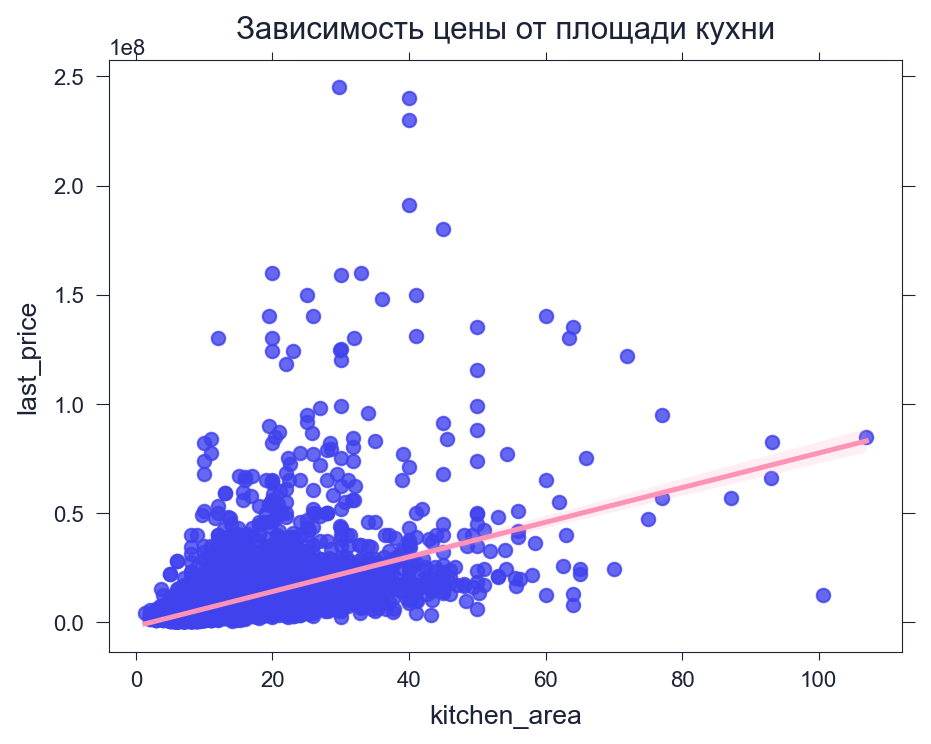

In [70]:
# Диаграмма для living_area
sns.regplot(x=df.living_area, y=df.last_price, line_kws=dict(marker=',', color='#FF92B7'))
plt.title('Зависимость цены от жилой площади')
plt.show()

# Диаграмма для kitchen_area
sns.regplot(x=df.kitchen_area, y=df.last_price, line_kws=dict(marker=',', color='#FF92B7'))
plt.title('Зависимость цены от площади кухни')
plt.show()

In [71]:
# Создаем регрессионную модель для living_area
model_living = sf.ols('last_price ~ living_area', df).fit()

# Отображаем информацию по модели
model_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             last_price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.878e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:37:21   Log-Likelihood:            -4.0291e+05
No. Observations:               23636   AIC:                         8.058e+05
Df Residuals:                   23634   BIC:                         8.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.206e+06   7.44e+04    -29.634      0.000   -2.35e+06   -2.06e+06
living_area  2.496e+05   1821.597    137.042      0.000    2.46e+05    2.53e+05
==============================================================================
Omnibus:                    38386.701   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47607020.030
Skew:                          10.538   Prob(JB):                         0.00
Kurtosis:                     221.852   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Создаем регрессионную модель для kitchen_area
model_kitchen = sf.ols('last_price ~ kitchen_area', df).fit()

# Отображаем информацию по модели
model_kitchen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             last_price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:37:27   Log-Likelihood:            -4.0542e+05
No. Observations:               23636   AIC:                         8.109e+05
Df Residuals:                   23634   BIC:                         8.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.866e+06   9.16e+04    -20.367      0.000   -2.05e+06   -1.69e+06
kitchen_area  7.929e+05   7681.594    103.217      0.000    7.78e+05    8.08e+05
==============================================================================
Omnibus:                    39766.904   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55126647.624
Skew:                          11.340   Prob(JB):                         0.00
Kurtosis:                     238.502   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как и ожидалось, результат аналогичен полученному для признака `total_area`:
1. Наблюдается статистически значимая линейная взаимосвязь между параметрами `living_area` и `total_price` с коэффициентом slope = 2.3 $\times$ 10^5;
2. Наблюдается статистически значимая линейная взаимосвязь между параметрами `kitchen_area` и `total_price` с коэффициентом slope = 7.9 $\times$ 10^5.

Перейдем к рассмотрению взаимосвязи м параметром `floor_type`:

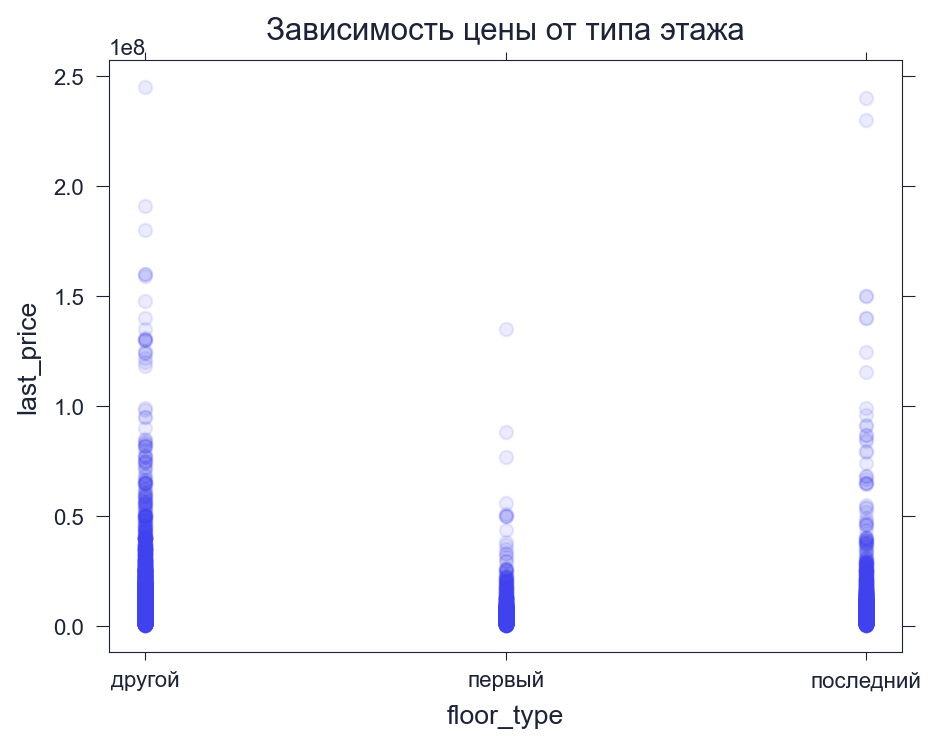

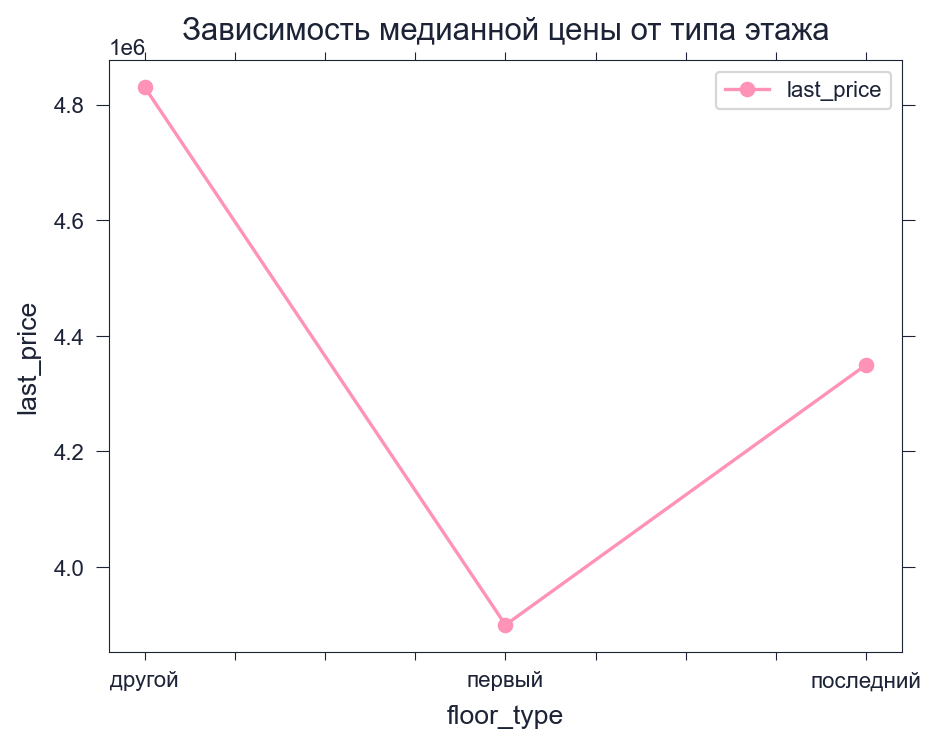

In [73]:
# Построим диаграмму рассеяния для типа этажа
plt.scatter(x=df.floor_type, y=df.last_price, alpha=0.1)
plt.xlabel('floor_type')
plt.ylabel('last_price')
plt.title('Зависимость цены от типа этажа')
plt.show()

# Построим линейный график для медианного значения
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(color='#FF92B7', marker='o', grid=False)
plt.xlabel('floor_type')
plt.ylabel('last_price')
plt.title('Зависимость медианной цены от типа этажа')
plt.show()

In [74]:
# Построим сводную таблицу
df.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
floor_type,,
другой,17317,4830000.0
первый,2914,3900000.0
последний,3405,4350000.0


Первый рисунок — диаграмма рассеяния для зависимости `floor_type`-`last_price`; второй рисунок — линейный график для медианного значения стоимости квартиры в зависимости от типа этажа.

1. Из построенной диаграммы рассеяния можно сделать вывод, что цены на квартиры, находящиеся на первом этаже, как правило, ниже по сравнению с другими этажами: такие квартиры считаются менее ликвиднаыми из-за шума и пыли, недостатка света, плохого вида из окна и т. д.
2. В новостройках квартиры на последнем этаже часто могут быть дороже других (они теплее и отличаются более высоким напором воды), в то время как на рынке вторичной недвижимости такие квартиры будут дешевле из-за ряда бытовых проблем.
3. Квартиры на других этажах (не на первом и не на последнем), как правило, дороже.

Рассмотрим зависимость цены квартиры от даты публикации объявления

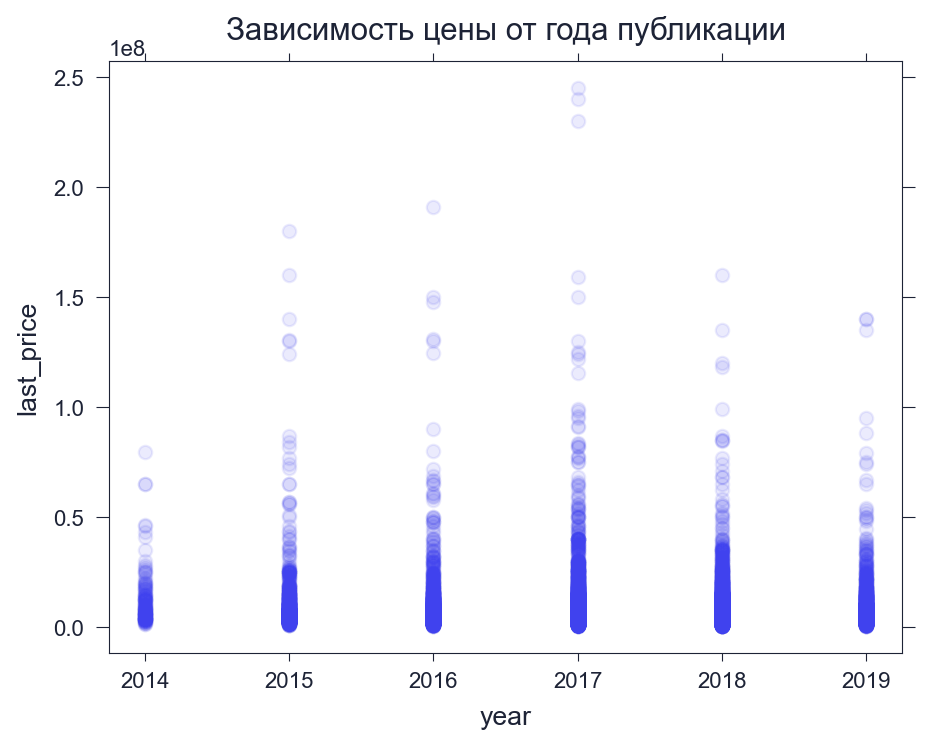

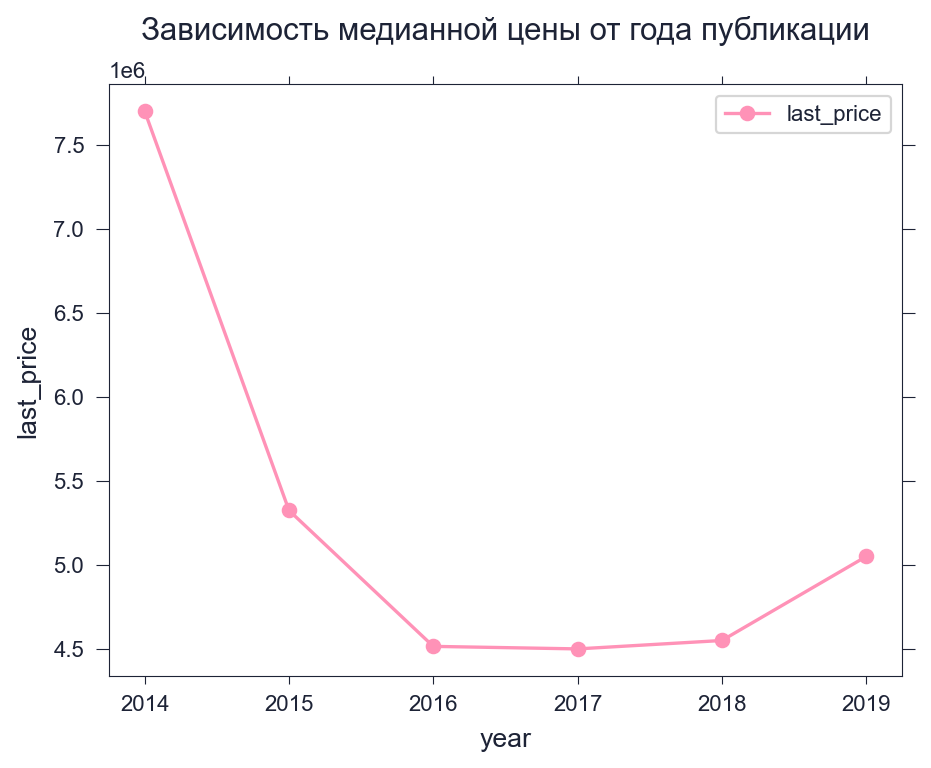

In [75]:
# Построим диаграмму рассеяния для года публикации
plt.scatter(x=df.year, y=df.last_price, alpha=0.1)
plt.xlabel('year')
plt.ylabel('last_price')
plt.title('Зависимость цены от года публикации')
plt.show()

# Построим линейный график для медианного значения
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(color='#FF92B7', marker='o', grid=False)
plt.xlabel('year')
plt.ylabel('last_price')
plt.title('Зависимость медианной цены от года публикации')
plt.show()

In [76]:
# Построим сводную таблицу
df.pivot_table(index='year', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
year,,
2014,137,7700000.0
2015,1185,5324000.0
2016,2778,4515000.0
2017,8169,4500000.0
2018,8498,4550000.0
2019,2869,5050000.0


Сводная таблица показывает, что выборки по годам не являются сбалансированными, и, в целом, сравнение корректно только для квартир, проданных начиная с 2016 года.

Построим аналогичный график для отфильтрованных данных:

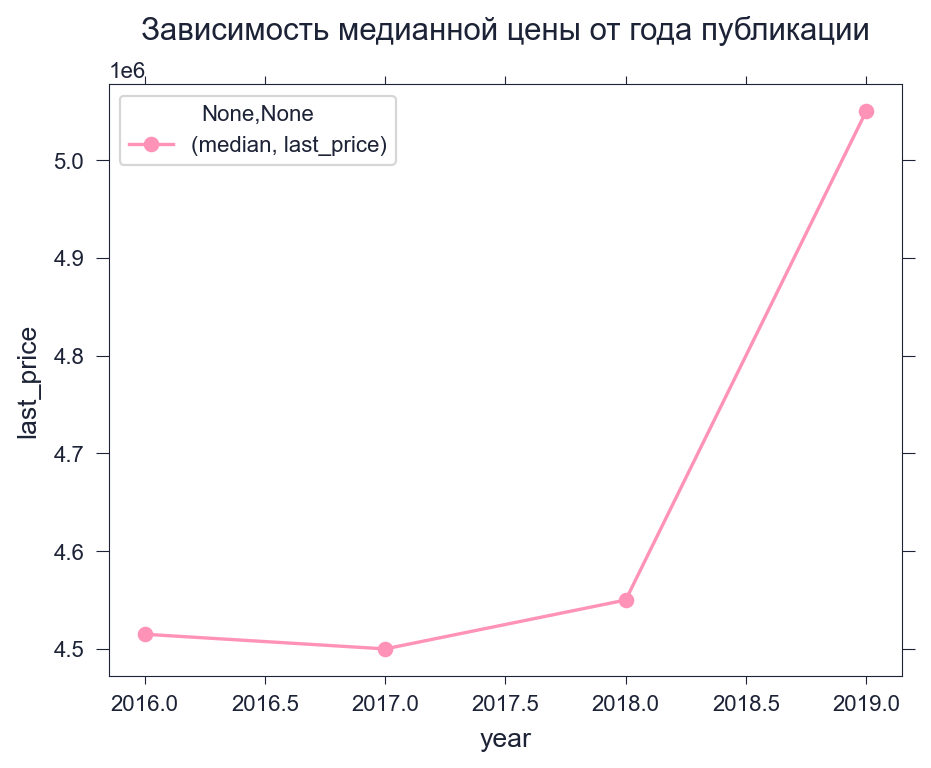

In [77]:
# Построим линейный график для отфильтрованных данных
df[df.year > 2015].pivot_table(index='year', values='last_price', aggfunc=['median']).plot(color='#FF92B7', marker='o', grid=False)
plt.xlabel('year')
plt.ylabel('last_price')
plt.title('Зависимость медианной цены от года публикации')
plt.show()

1. В 2017 году медианная цена квартиры незначительно уменьшилась по сравнению с 2016 годом;
2. Далее наблюдается устойчивый тренд на рост медианной цены квартиры, причем в период 2018-2019 гг. медианная стоимость квратиры увеличилась на 11 %.

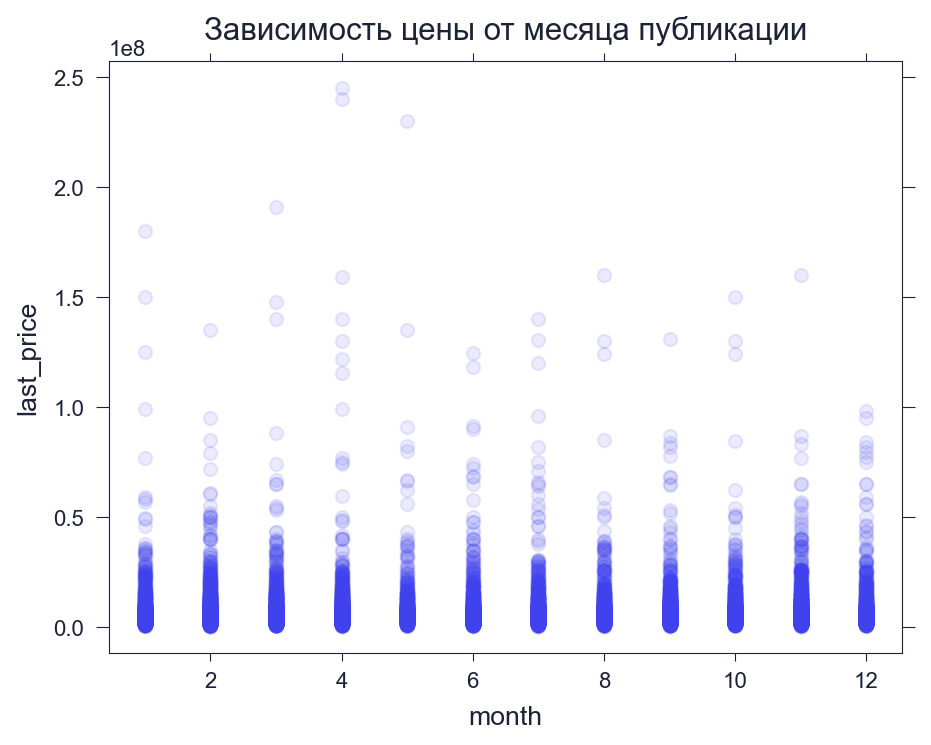

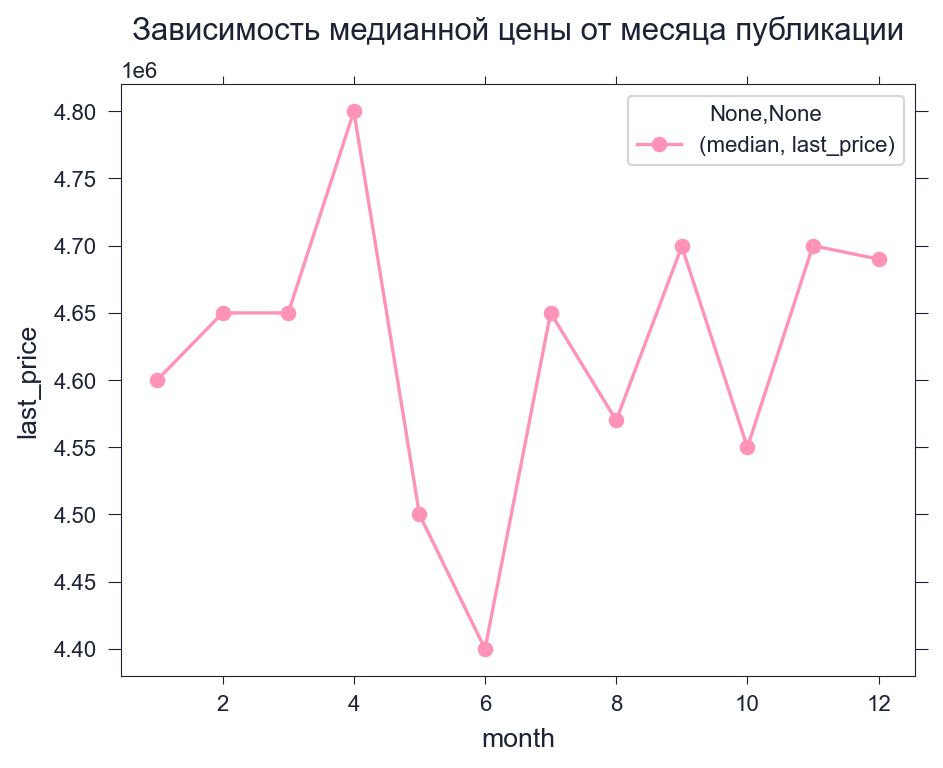

In [78]:
# Построим диаграмму рассеяния для месяца публикации
plt.scatter(x=df.month, y=df.last_price, alpha=0.1)
plt.xlabel('month')
plt.ylabel('last_price')
plt.title('Зависимость цены от месяца публикации')
plt.show()

# Построим линейный график для медианного значения
df.pivot_table(index='month', values='last_price', aggfunc=['median']).plot(color='#FF92B7', marker='o', grid=False)
plt.xlabel('month')
plt.ylabel('last_price')
plt.title('Зависимость медианной цены от месяца публикации')
plt.show()

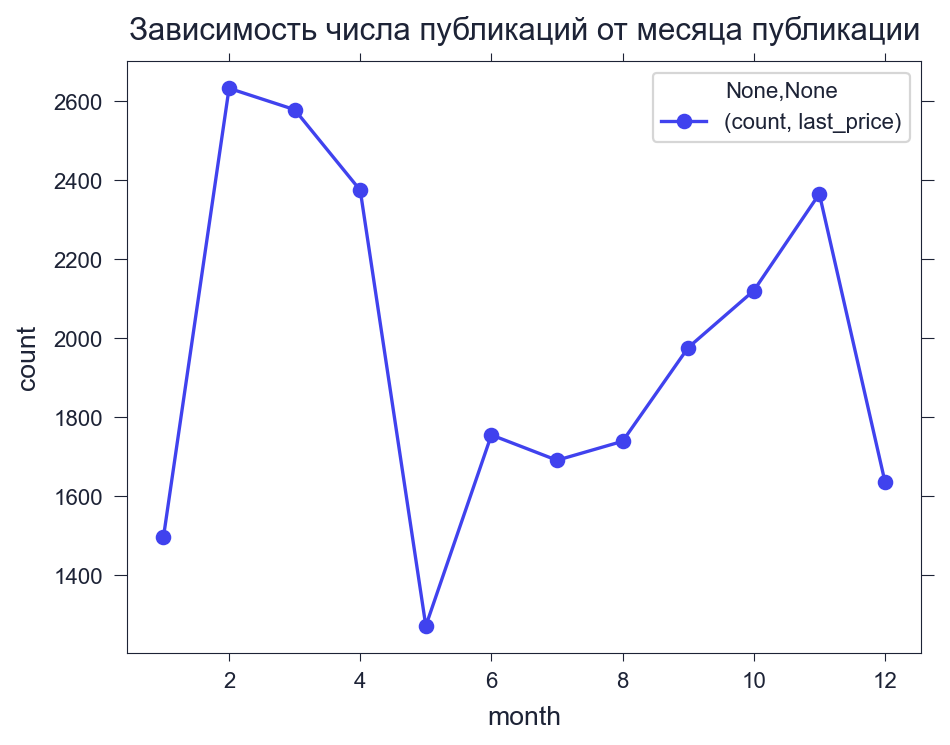

In [79]:
# Построим линейный график для числа публикаций
df.pivot_table(index='month', values='last_price', aggfunc=['count']).plot(color='#4042EE', marker='o', grid=False)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Зависимость числа публикаций от месяца публикации')
plt.show()

In [80]:
# Построим сводную таблицу
df.pivot_table(index='month', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
month,,
1,1497,4600000.0
2,2632,4650000.0
3,2578,4650000.0
4,2374,4800000.0
5,1272,4500000.0
6,1755,4400000.0
7,1691,4650000.0
8,1739,4570000.0


Можно сделать вывод о том, что как медианная цена квартиры, так и число публикаций в целом циклически изменяется в течение года:
1. Для цены квартиры в начале года наблюдается рост, достигающий своего пика в апреле, затем следует спад (наиболее дешевые квратиры публикуются в июне), после чего следует постепенный рост, который, все же, подвержен колебаниям;
2. Похожая картина наблюдается для количества объявлений: меньше всего их в январе, мае и декабре, а больше всего — в феврале и ноябре.

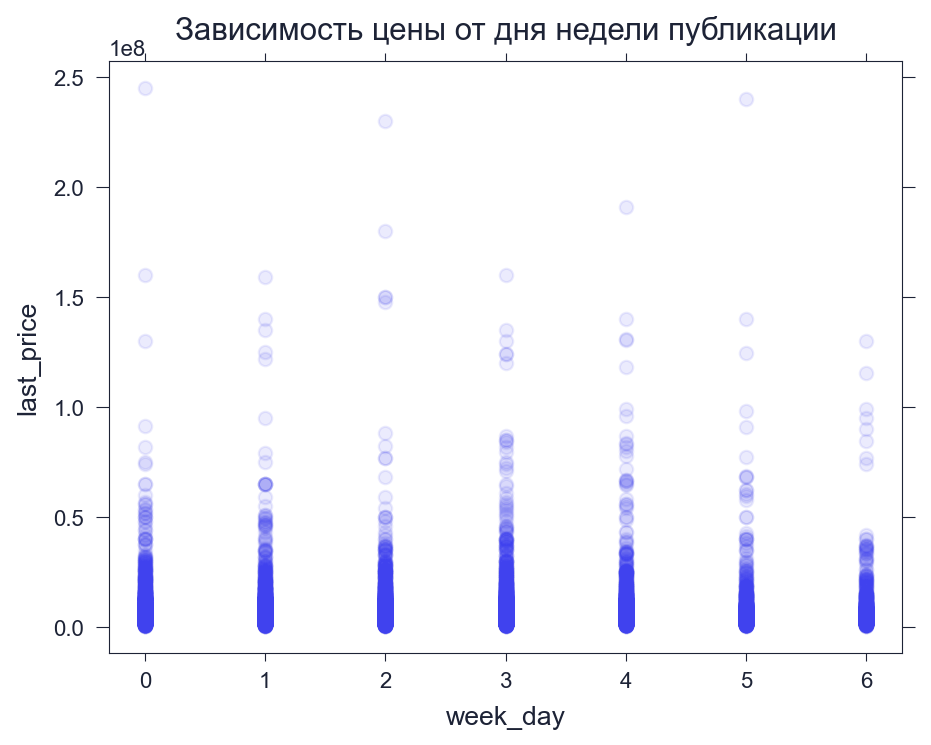

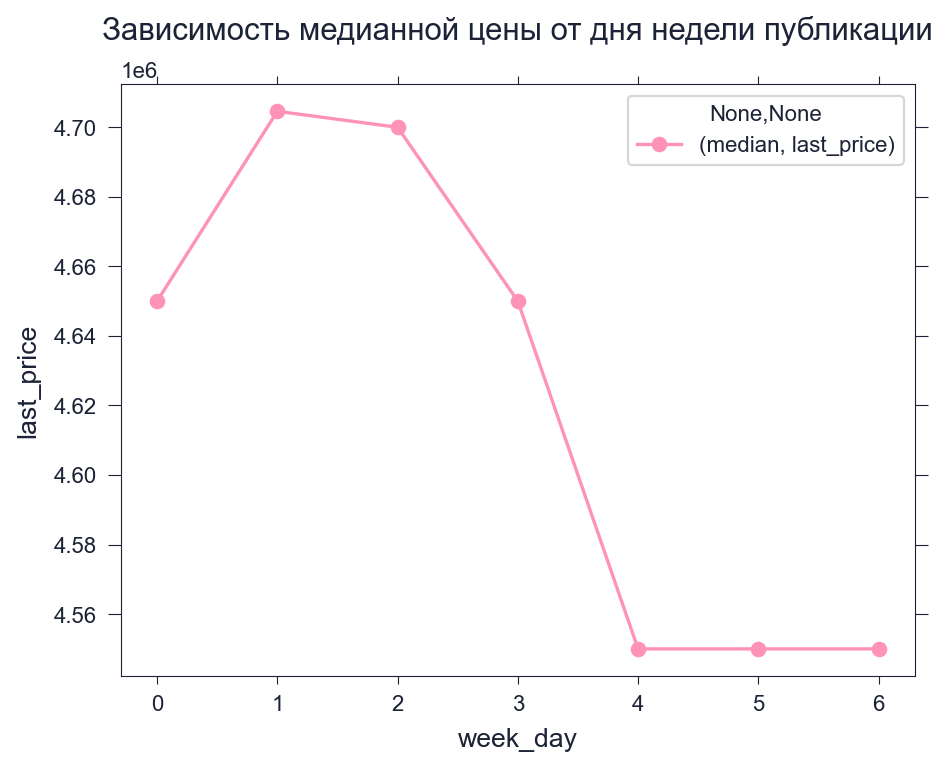

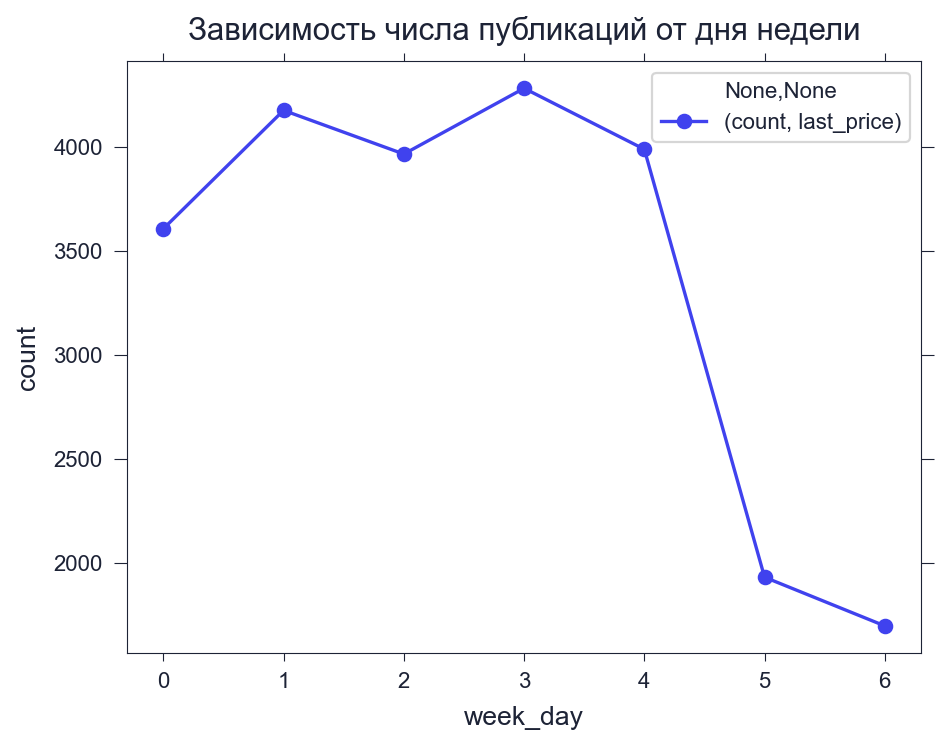

In [81]:
# Построим диаграмму рассеяния для дня недели публикации
plt.scatter(x=df.week_day, y=df.last_price, alpha=0.1)
plt.xlabel('week_day')
plt.ylabel('last_price')
plt.title('Зависимость цены от дня недели публикации')
plt.show()

# Построим линейный график для медианного значения
df.pivot_table(index='week_day', values='last_price', aggfunc=['median']).plot(color='#FF92B7', marker='o', grid=False)
plt.xlabel('week_day')
plt.ylabel('last_price')
plt.title('Зависимость медианной цены от дня недели публикации')
plt.show()

# Построим линейный график для числа публикаций
df.pivot_table(index='week_day', values='last_price', aggfunc=['count']).plot(color='#4042EE', marker='o', grid=False)
plt.xlabel('week_day')
plt.ylabel('count')
plt.title('Зависимость числа публикаций от дня недели')
plt.show()

In [82]:
# Построим сводную таблицу
df.pivot_table(index='week_day', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
week_day,,
0,3605,4650000.0
1,4174,4704595.0
2,3964,4700000.0
3,4280,4650000.0
4,3987,4550000.0
5,1930,4550000.0
6,1696,4550000.0


Можно сделать вывод о том, что как медианная цена квартиры, так и число публикаций в целом циклически изменяется в течение недели:
1. Число наблюдений распределено равномерно в течение рабочих дней, а на выходных число публикаций значительно снижается (практически в 2 раза);
2. Медианная цена квартиры достигает своего пика во вторник и среду, после чего к выходным снижается на 3.2 %.

Построим корреляционную матрицу для рассмотренных признаков:

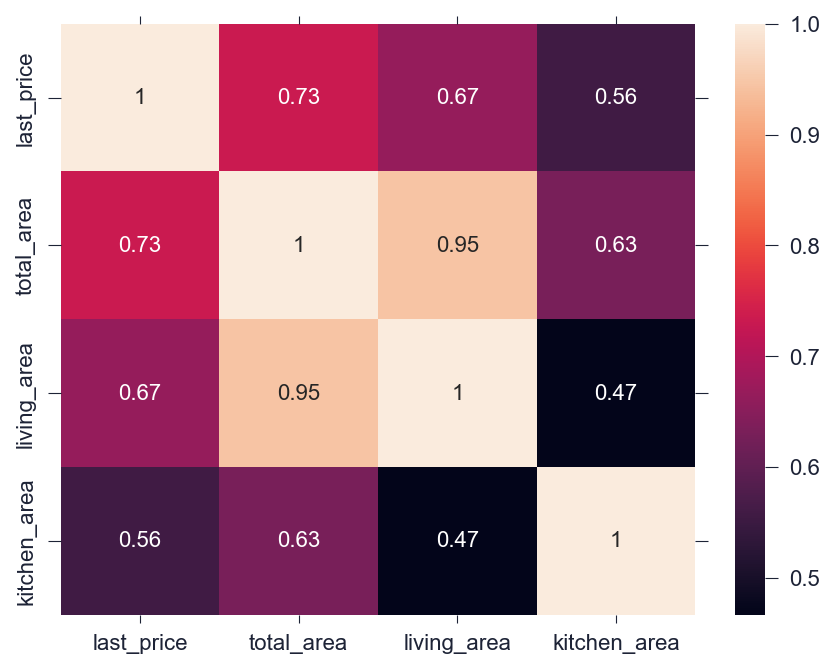

In [83]:
# Признаки для сравнения
cols = ['last_price', 'total_area', 'living_area', 'kitchen_area']

# Строим корреляционную матрицу
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

**Выводы**:
1. Признаки `total_area`, `living_area` и `kitchen_area` имеют статистически значимую линейную взаимосвязь с целевой переменной `last_price` со значениями коэффициента slope 1.7 $\times$ 10^5, 2.3 $\times$ 10^5 и 7.9 $\times$ 10^5 соответственно. Наличие этой взаимосвязи также подтверждается высокими значениями коэффициента корреляции: 0.73, 0.66 и 0.56 соответственно;
2. Связь между типом этажа и стоимостью квартиры отвечает ожиданиям: самые дешевые квартиры расположены на первом этаже: медианное значение 3 900 000 руб, что на 20 % меньше медианной цены квартиры на других этажах. Квартиры на последнем этаже дороже квартир на первом, но все равно дешевле квартир на других этажах: медианное значение 4 300 000 руб, что на 11 % меньше медианной цены квартиры на других этажах
3. Зависимость между датой публикации нелинейна:
    * Выборки по годам не являются сбалансированными, и корректно сравнивать только данные за 2016-2019 гг.: в это время наблюдается небольшое падение, а зачем значительный рост стоимости квартир, в частности, в период 2018-2019 гг. медианная стоимость квратиры увеличилась на 11 %.;
    * Как медианное стоимость квартиры, так и количество объявлений изменяются в течение года циклически и синхронно: пик наблюдается дважды — весной и осенью (с медианной стоимостью 4 800 000 руб и 4 700 000 руб соответственно), а в декабре и июне наблюдается падение на 4 % и 8 % соответственно;
    * Изменение медианной стоимости квартиры (как и общего числа объявлений) также вариативно в зависимости от дня недели: в рабочик дни цены, как правило, выше (с пиком во вторник — 4 700 000 руб), а к выходным медианная цена уменьшается на 4 %;
4. В целом, все из рассмотренных признаков могут быть рекомендованы для учета при прогнозировании цены квартиры, однако, вместо трех параметров `total_area`, `living_area` и `kitchen_area`, которые являются взаимо заменяемыми и сильно коррелируют друг с другом, достаточно использовать один из них — `total_area`, обладающий наибольшей корреляцией с целевой переменной (значение коэффициента корреляции: 0.73). Кроме того, это замечание позволит при создании модели избежать проблем, связанных с мультиколлинеарностью предикторов.

### 4.4. Средняя цена квадратного метра
<a class="anchor" id="4.4"></a>

Определим 10 населенных пунктов с наибольшим числом объявлений:

In [84]:
# Отберем 10 пунктов с наибольшим числом объявлений
locations = df.locality_name.value_counts()[:10].index
locations

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

Построим сводную таблицу (а также столбчатую диаграмму) с количеством объявлений и средней ценой квадратного метра для десяти населенных пунктов с наибольшим числом объявлений:

In [85]:
# Построим сводную таблицу
sq_m_pivot = (
    df.query('locality_name in @locations')
    .pivot_table(index='locality_name',
                 values='sq_m_price',
                 aggfunc=['count', 'mean'])
)
sq_m_pivot.columns = ['count', 'sq_m_mean']
sq_m_pivot = sq_m_pivot.sort_values(by='sq_m_mean', ascending=False)
sq_m_pivot

,count,sq_m_mean
locality_name,,
Санкт-Петербург,15663,114348.515469
Пушкин,369,103125.819377
деревня Кудрово,299,92473.547559
поселок Парголово,327,90175.913089
поселок Мурино,556,85681.762572
поселок Шушары,440,78677.364318
Колпино,338,75424.579112
Гатчина,307,68746.146515
Всеволожск,398,68654.473970


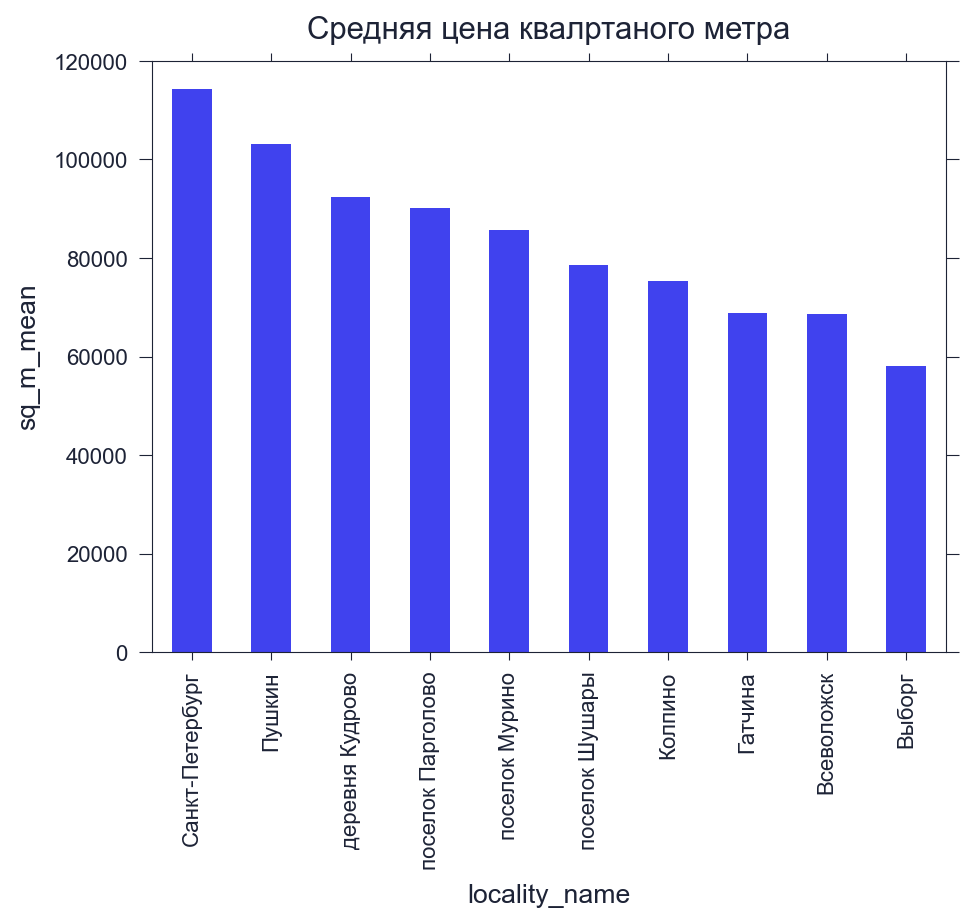

In [86]:
sq_m_pivot['sq_m_mean'].plot(kind='bar', title='Средняя цена квалртаного метра', ylabel='sq_m_mean')
plt.show()

Рассчитаем общую среднюю цену одного квадратного метра в этих населенных пунктах:

In [87]:
print(f'Средняя цена одного квадратного метра: {round(sq_m_pivot.sq_m_mean.mean())} руб / м²')

Средняя цена одного квадратного метра: 83545 руб / м²


**Выводы:**
1. На этом шаге были определены средние цены за квадртаный метр для квартир, находящихся в 10 населенных пунктах с наибольшим числом наблюдений: как и ожидалось, наибольшая стоимость квадртаного метра характерна для Санкт-Петербурга; для выбранных населенных пунктом наименьшая стоимость квадратного метра — в Выборге;
2. Среднее значение цены одного квадртаного метра для выбранных населенных пунктов — 83 500 руб / м²: эта цена чуть меньше средней цены квадратного метра для Мурино;
3. В Санкт-Петербурге средняя цена квадртаного метра больше общего среднего на 37 %, в то время как в Выборге средняя цена квадратного метра меньше общего среднего на 30 %.

### 4.5. Зависимость цены от расстояния до центра
<a class="anchor" id="4.5"></a>

Выделим только квартиры, расположенные в Санкт-Петербурге, и вычислим их среднюю стоимость в зависимости от расстояния до центра, учитывая каждый километр расстояния:

In [88]:
# Построим сводную таблицу
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_km',
                 values='last_price',
                 aggfunc=['count', 'mean'])
    .sort_values(by='city_centers_km')
)

,count,mean
,last_price,last_price
city_centers_km,,
0.0,27,3.144912e+07
1.0,188,1.814496e+07
2.0,308,1.650786e+07
3.0,349,1.110832e+07
4.0,684,1.217207e+07
5.0,917,1.397949e+07
6.0,616,1.513335e+07
7.0,418,1.454352e+07


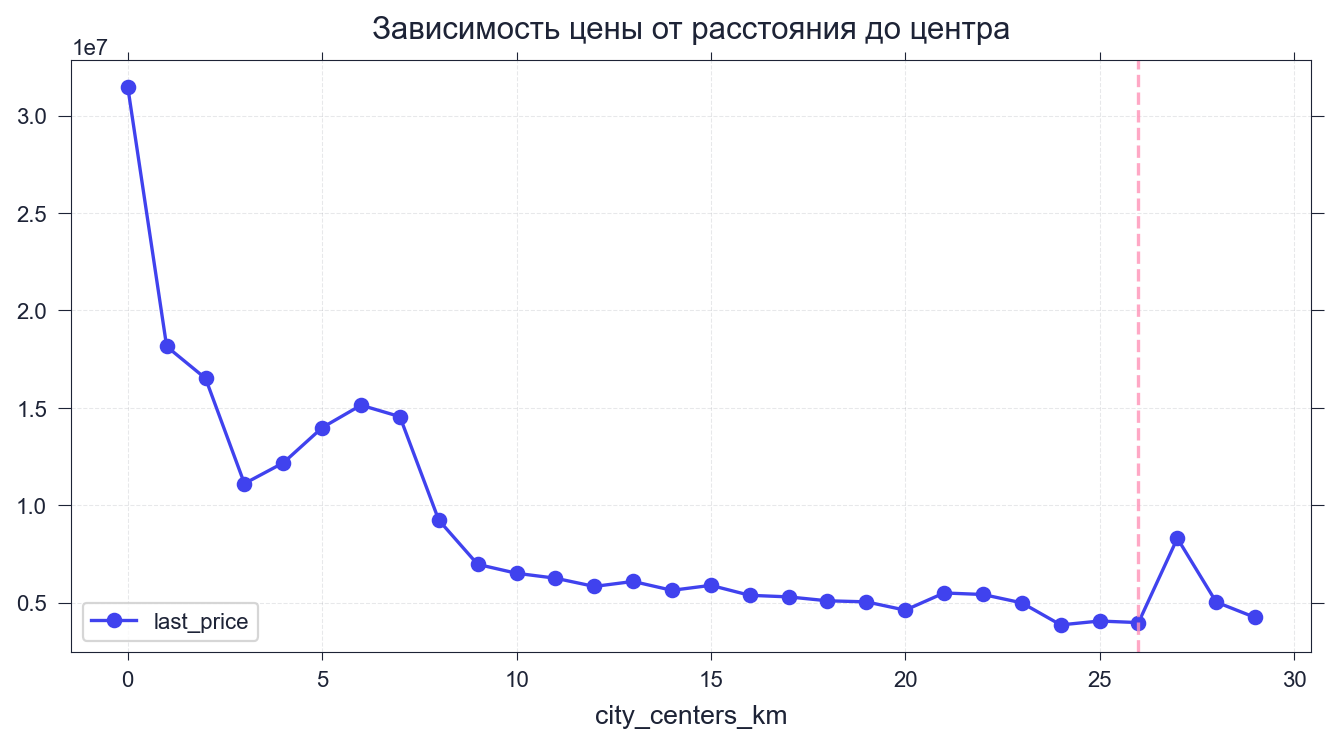

In [89]:
# Построим линейный график
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_km',
                 values='last_price',
                 aggfunc='mean')
    .sort_values(by='city_centers_km')
    .plot(title='Зависимость цены от расстояния до центра', marker='o', grid=True,
          figsize=(10, 4.8))
)
plt.axvline(x = 26, color = '#FF92B7', marker=',', alpha=0.8, linestyle='--')
plt.show()

**Выводы:**
1. Количество квартир в зависимости от расстояния до центра распределено неравномерно: при расстоянии до центра более 26 (пунктирная линия на графике) нарушается требование сбалансированности выборок, что не позволяет корректно сравнивать квартиры, удаленные от центра более, чем на 26 км;
2. Как и ожидалось, наиболее дорогие квартиры расположены ближе к центру, однако на линейном графике отражен резкий спад в цене для квартир, расположенных на удалении 3-5 км от центра (так, квартиры, с расстоянием 3 км в среднем дешевле квартир с расстоянием 6 км на 27 %)
3. Это можно объяснить следующим образом: квартиры, расположенные на расстоянии 3-5 км от центра, находятся в историческом центре города, где состояние домов хуже по сравнению с более новыми домами, расположенными на расстоянии более 6 км в районах, застраивающихся и сейчас;
4. Значительное падение средней цены на квартиру наблюдается на рубеже 7-9 км от центра;
5. Наиболее активная застройка в Санкт-Петербурге в настоящий момент осуществлется в районах, удаленностью более 9 км от центра: там средняя стоимость квартиры при удалении от центра составляет около 6 000 000 руб и незначительно уменьшается;
6. Аномальные увеличения цены, соответствующее расстояниям 27 км и 41 км от центра вызваны несбалансированностью выборок (число наблюдений — 2 и 1 соответственно).

## 5. Общий вывод
<a class="anchor" id="5.0"></a>

Имевшиеся в распоряжении данные состоят из 23 700 наблюдений и 22 признаков и предсталвяют собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Информация для датасета собиралась двумя способами: часть вписывалась пользователями, часть определялась автоматически с использованием геосервисов.

В ходе предобработки данных была проделана работа:
1. В датасете было обнаружен 15 столбцов с пропусками;
2. Данные, заполняемые пользователями вручную, были заполнены медианными значениями (для столбцов `kitchen_area` и `living_area` был использован более сложный подход), или подходящими по смыслу значениями;
3. Пропуски в столбцах `locality_name` и `days_exposition` не заполнялись: заполнение для `locality_name` могло бы исказть распределение квратир для Ленобласти; наличие пропусков в `days_exposition` свидетельтсвует о том, что квартира не былы продана;
4. Пропуски в данных, заполняемых автоматически, как правило, свойственны наблюдениям, находящимся за пределами Санкт-Петербурга:
    * Если в дальнейшем автоматизированная система будет работать только с квартирами, расположенными в Санкт-Петербурге, этих данных вполне достаточно;
    * Иначе необходимо связаться с разработчиками и сообщить им о выявленных недостатках автоматизированного заполнения информации;
5. Логичную замену для пропусков в столбцах, заполненных автоматически, предложить невозможно, поэтому пропуски в них были оставлены без изменений;
6. Было произведено преобразование типов данных, позволившее не только использовать более подходящие для каждого столбца типы данных, но также уменьшить размер датафрейма от 3.5 MB до 2.9 MB;
7. Были устранены неявные дубликаты в столбце `locality_name`.

В датасет были добавлены новые столбцы с информацией:
* цена одного квадратного метра;
* день недели, месяц и год публикации;
* тип этажа квартиры;
* расстояние до центра города в километрах.

На этапе исследоватлеьского анализа данных была произведена работа по удалению аномальных значений с сохранением подавляющего большинства данных (число наблюдений уменьшилось на 0.3 %).

Была проанализирована длительность размещения объявлений:
* Медианное значение длительности размещения объявления составляет 95 дней, а среднее — 169 дней со стандартным отклонением 206.4;
* 25 % объявлений снимаются через 45 дней: такие продажи можно считать быстрыми;
* 75 % объявлений снимаются через 200 дней: такие продажи можно считать долгими.

Среди факторов, влияющих на стоимость квартиры, были выделены следующие:
1. Признаки `total_area`, `living_area` и `kitchen_area`: имеют статистически значимую линейную взаимосвязь с целевой переменной `last_price` со значениями коэффициента slope 1.7 $\times$ 10^5, 2.3 $\times$ 10^5 и 7.9 $\times$ 10^5 соответственно. Наличие этой взаимосвязи также подтверждается высокими значениями коэффициента корреляции: 0.73, 0.66 и 0.56 соответственно;
2. Тип этажа:
   * Cамые дешевые квартиры расположены на первом этаже (медиана 3 900 000 руб на 20 % меньше медианной цены квартиры на других этажах);
   * Квартиры на последнем этаже дороже квартир на первом, но все равно дешевле квартир на других этажах (медиана 4 300 000 руб, что на 11 % меньше медианной цены квартиры на других этажах);
3. Зависимость между датой публикации нелинейна:
    * В целом, за период 2016-2019 гг. наблюдает увеличение стоимости квратир (наиболее значительное — рост на 11 % в 2018-2019);
    * Медианная стоимость в течение года изменяется циклически: пик наблюдается дважды — весной и осенью (с медианной стоимостью 4 800 000 руб и 4 700 000 руб соответственно), а в декабре и июне наблюдается падение на 4 % и 8 % соответственно;
    * Изменение медианной стоимости квартиры вариативно в зависимости от дня недели: в рабочик дни цены, как правило, выше (с пиком во вторник — 4 700 000 руб), а к выходным медианная цена уменьшается на 4 %.
  
Была построена сводную таблицу с количеством объявлений и средней ценой квадратного метра для десяти населенных пунктов с наибольшим числом объявлений:
* Наибольшая стоимость квадртаного метра характерна для Санкт-Петербурга; для выбранных населенных пунктом наименьшая стоимость квадратного метра — в Выборге;
* Среднее значение цены одного квадртаного метра для выбранных населенных пунктов — 83 500 руб / м²: эта цена чуть меньше средней цены квадратного метра для Мурино;
* В Санкт-Петербурге средняя цена квадртаного метра больше общего среднего на 37 %, в то время как в Выборге средняя цена квадратного метра меньше общего среднего на 30 %.

Была проанализирована срезняя стоимость цены в зависимости от расстояния до центра:
* Хотя ожидалось, что стоимость квартир будет постепенно уменьшаться по мере удаления от центра, на линейном графике отчетливо виден спад в цене для квартир, расположенных на удалении 3-5 км от центра (так, квартиры, с расстоянием 3 км в среднем дешевле квартир с расстоянием 6 км на 27 %);
* Это можно объяснить следующим образом: квартиры, расположенные на расстоянии 3-5 км от центра, находятся в историческом центре города, где состояние домов хуже по сравнению с более новыми домами, расположенными на расстоянии более 6 км в районах, застраивающихся и сейчас;
* Наиболее активная застройка в Санкт-Петербурге в настоящий момент осуществлется в районах, удаленностью более 9 км от центра: там средняя стоимость квартиры при удалении от центра составляет около 6 000 000 руб и незначительно уменьшается.

Таким образом, выялвенные в ходе исследоватлеьского анализа данных закономерности могут быть рекомендованы для учета при разработке автоматизированной системы для отслеживания аномалий и мошеннической деятельности.